# Data Wrangling Notebook

## Introduction

This notebook is dedicated to the process of data wrangling, focusing on crime data from the Chicago Police Department and Chicago property data from a real estate listing service. The aim is to clean, prepare, and integrate these datasets to enable comprehensive analysis and insights into crime trends and their impact on property values in Chicago.


## Data Sources

THe datasets used in this notebook are sourced from: 

- **Crime data**: Sourced from Chicago Data Portal and maintained by Chicago Police Department. Contains reported incidents of crime (excluding murders) that occured in Chicago. Each row represents a single reported crime incident. (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

- **Property data**: colected from HomeHarvest real estate scraping library that extracts and formats data in the style of MLS listings. Fetches properties directly from Realtor.com and structures data to resemble MLS listings. Each row represents a single property listing. (https://github.com/Bunsly/HomeHarvest)


## Dataset Descriptions 

### Crime Data

| Column Name          | Description                                                                                                    | Type         |
|----------------------|--------------------------------------------------------------------------------------------------------------|--------------|
| ID                   | Unique identifier for the record.                                                                             | Number       |
| Case Number          | The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.           | Plain Text   |
| Date                 | Date when the incident occurred. This is sometimes a best estimate.                                            | Date & Time  |
| Block                | The partially redacted address where the incident occurred, placing it on the same block as the actual address.| Plain Text   |
| IUCR                 | The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at link. | Plain Text   |
| Primary Type         | The primary description of the IUCR code.                                                                     | Plain Text   |
| Description          | The secondary description of the IUCR code, a subcategory of the primary description.                         | Plain Text   |
| Location Description | Description of the location where the incident occurred.                                                        | Plain Text   |
| Arrest               | Indicates whether an arrest was made.                                                                         | Checkbox     |
| Domestic             | Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.          | Checkbox     |
| Beat                 | Indicates the beat where the incident occurred.                                                               | Plain Text   |
| District             | Indicates the police district where the incident occurred.                                                     | Plain Text   |
| Ward                 | The ward (City Council district) where the incident occurred.                                                  | Number       |
| Community Area       | Indicates the community area where the incident occurred. Chicago has 77 community areas.                      | Plain Text   |
| FBI Code             | Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications here. | Plain Text   |
| X Coordinate         | The x-coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. | Number       |
| Y Coordinate         | The y-coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. | Number       |
| Year                 | Year the incident occurred.                                                                                   | Number       |
| Updated On           | Date and time the record was last updated.                                                                    | Date & Time  |
| Latitude             | The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block. | Number       |
| Longitude            | The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block. | Number       |
| Location             | The location where the incident occurred in a format that allows for the creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same bl### Chicago MLS Property data from Realtor.com o  |


## Property Data

| Column           | Data Type | Description                                   |
|------------------|-----------|-----------------------------------------------|
| property_url     | string    | URL of the property listing                   |
| mls_number       | string    | MLS (Multiple Listing Service) number of the property                                      |
| status           | string    | Status of the listing (e.g., for_sale, for_rent, sold)                                   |
| street_number    | string    | Street number of the property address         |
| street_name      | string    | Street name of the property address           |
| unit             | string    | Unit number of the property address           |
| city             | string    | City of the property address                   |
| state            | string    | State of the property address                  |
| zipcode          | string    | ZIP code of the property address               |
| county           | string    | County of the property address                 |
| beds             | integer   | Number of bedrooms                            |
| baths            | float     | Number of bathrooms                           |
| sq_ft            | integer   | Square footage of the property                |
| property_type    | string    | Type of property (e.g., single_family, condo, townhouse)                                    |
| list_date        | date      | Date the property was listed                  |
| list_price       | float     | List price of the property                    |
| last_sold_date   | date      | Date the property was last sold               |
| last_sold_price  | float     | Last sold price of the property               |
| hoa_fee          | float     | Monthly homeowners association fee            |
| taxes            | float     | Annual property taxes                         |
| lot_size         | float     | Size of the property lot                      |
| year_built       | integer   | Year the property was built                   |
| description      | string    | Description of the property                   |
| images           | list      | List of image URLs for the property           |
n      | string    | Description of the property                   |
| images           | list      | List of image URLs for the property           |
e URLs for the property |same block. | Location



# Table of Contents

* [Data Wrangling Notebook](#data-wrangling-notebook)
    * [Crime Data](#crime-data)
    * [Property Data](#property-data)
* [I. Data Collection](#data-collection)
    * [Crime Data: Fetching Chicago crime data (10 years)](#fetching-chicago-crime-data-10-years)
        * [Merging all crime years to one dataframe](#merging-all-crime-years-to-one-dataframe)
        * [Exporting crime data](#exporting-crime-data)
    * [Property Data: Fetching Chicago property data (10 years)](#fetching-chicago-property-data-10-years)
        * [Export property data](#export-property-data)
* [II. Data Cleaning](#data-cleaning)
    * [1. Initial Data Assessment](#initial-data-assessment)
        * [A. Crime Data](#crime-data-assessment)
            * [Initial Observations](#initial-observations-crime)
            * [Distribution of Categorical Features](#distribution-categorical-features-crime)
            * [Distribution of incidents per year](#distribution-incidents-year-crime)
        * [B. Property Data](#property-data-assessment)
            * [Initial observations](#initial-observations-property)
            * [Distribution of numerical variables within upper and lower bounds](#distribution-numerical-variables-property)
            * [Distribution of categorical features](#distribution-categorical-features-property)
            * [Sold Price](#sold-price)
     * [2. Data Cleaning](#data-cleaning-2)
        * [A. Crime Data Cleaning](#crime-data-cleaning)
            * [Columns to remove](#columns-remove-crime)
            * [Handling missing values](#handling-missing-values-crime)
            * [Correcting data types and formats](#correcting-data-types-crime)
            * [Handling duplicates](#handling-duplicates-crime)
        * [B. Property Data Cleaning](#property-data-cleaning)
            * [Columns to remove](#columns-remove-property)
            * [Standardizing values](#standardizing-values-property)
            * [Handling missing values](#handling-missing-values-property)
            * [Handling outliers](#handling-outliers-property)
            * [Missing values: Applying mean, median, and regression imputation to the `beds`, `full_baths`, and `sqft`](#applying-imputation-beds-sqft)
* [III. Feature Engineering](#feature-engineering)
    * [Adding neighborhood and region labels to crime and property data](#neighborhood-region-labels)
    * [Mapping crime incident types to categories](#mapping-crime-incident-types)
    * [Keeping only incidents that led to an arrest, violent and drug-related crimes](#arrests-property-violent-drug)
    * [Total crimes for each crime category by year and community](#total-crimes-category)
    * [Total Poulation for each community](#total-population)
    * [Merging final_data with crime_totals](#merge-finaldata-crimetotals)


In [24]:
import pandas as pd
from sodapy import Socrata
from datetime import datetime
from datetime import datetime, timedelta
import missingno as msno
from homeharvest import scrape_property
from requests.exceptions import HTTPError
import geopandas as gpd
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import geopandas as gpd
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

ModuleNotFoundError: No module named 'sodapy'

## 1. Data Collection <a id="data-collection"></a>

### Crime Data: Fetching Chicago crime data (10 years) <a id="fetching-chicago-crime-data-10-years"></a>

Data collected from City of Chicago's API endpoint of crime records. (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

#### 2014 Chicago Crime Data

In [120]:
api_token = "DQdKNTCLRmXZ2yDZBqPY8HBpM"

client = Socrata("data.cityofchicago.org", api_token)

start_date = "2014-01-01T00:00:00.000"
end_date = "2014-12-31T23:59:59.999"

dataset_identifier = "qnmj-8ku6"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2014 = pd.DataFrame.from_records(results)

print(df_2014.head())

KeyboardInterrupt: 

#### 2015 Chicago Crime Data

In [ ]:
start_date = "2015-01-01T00:00:00.000"
end_date = "2015-12-31T23:59:59.999"

dataset_identifier = "vwwp-7yr9"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2015 = pd.DataFrame.from_records(results)

print(df_2015.head())

                      date  \
0  2015-12-31T23:59:00.000   
1  2015-12-31T23:59:00.000   
2  2015-12-31T23:55:00.000   
3  2015-12-31T23:50:00.000   
4  2015-12-31T23:50:00.000   

                                                                                                                                                      location  \
0  {'latitude': '41.757366519', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.642992854'}   
1                                                                                                                                                          NaN   
2  {'latitude': '41.751270452', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.585822373'}   
3  {'latitude': '42.016804165', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.690708662'}   
4  {'lati

#### 2016 Chicago Crime Data

In [ ]:
start_date = "2016-01-01T00:00:00.000"
end_date = "2016-12-31T23:59:59.999"

dataset_identifier = "kf95-mnd6"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2016 = pd.DataFrame.from_records(results)

print(df_2016.head())

                      date  \
0  2016-12-31T23:59:00.000   
1  2016-12-31T23:58:00.000   
2  2016-12-31T23:55:00.000   
3  2016-12-31T23:55:00.000   
4  2016-12-31T23:54:00.000   

                                                                                                                                                      location  \
0  {'latitude': '41.976290414', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.905227221'}   
1  {'latitude': '41.688033246', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.623931468'}   
2  {'latitude': '41.886814897', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.625592678'}   
3   {'latitude': '41.936884881', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.66476981'}   
4  {'lati

#### 2017 Chicago Crime Data

In [ ]:
start_date = "2017-01-01T00:00:00.000"
end_date = "2017-12-31T23:59:59.999"

dataset_identifier = "d62x-nvdr"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2017 = pd.DataFrame.from_records(results)

print(df_2017.head())

                      date  \
0  2017-12-31T23:58:00.000   
1  2017-12-31T23:50:00.000   
2  2017-12-31T23:48:00.000   
3  2017-12-31T23:45:00.000   
4  2017-12-31T23:45:00.000   

                                                                                                                                                      location  \
0  {'latitude': '41.965693651', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.715726125'}   
1  {'latitude': '41.926558908', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.631294073'}   
2  {'latitude': '41.895750913', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.623495923'}   
3  {'latitude': '41.683369303', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.622829524'}   
4  {'lati

#### 2018 Chicago Crime Data

In [ ]:
start_date = "2018-01-01T00:00:00.000"
end_date = "2018-12-31T23:59:59.999"

dataset_identifier = "3i3m-jwuy"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2018 = pd.DataFrame.from_records(results)

print(df_2018.head())

                      date  \
0  2018-12-31T23:59:00.000   
1  2018-12-31T23:59:00.000   
2  2018-12-31T23:59:00.000   
3  2018-12-31T23:57:00.000   
4  2018-12-31T23:56:00.000   

                                                                                                                                                      location  \
0  {'latitude': '41.763181359', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.657709477'}   
1                                                                                                                                                          NaN   
2  {'latitude': '41.689078832', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.696064026'}   
3  {'latitude': '41.740520866', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.647390719'}   
4  {'lati

#### 2019 Chicago Crime Data

In [ ]:
start_date = "2019-01-01T00:00:00.000"
end_date = "2019-12-31T23:59:59.999"

dataset_identifier = "w98m-zvie"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2019 = pd.DataFrame.from_records(results)

print(df_2019.head())

                      date  \
0  2019-12-31T23:55:00.000   
1  2019-12-31T23:54:00.000   
2  2019-12-31T23:50:00.000   
3  2019-12-31T23:48:00.000   
4  2019-12-31T23:46:00.000   

                                                                                                                                                      location  \
0  {'latitude': '41.769150218', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.627136786'}   
1  {'latitude': '41.779173667', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.653277703'}   
2                                                                                                                                                          NaN   
3  {'latitude': '41.874623951', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.745052647'}   
4  {'lati

#### 2020 Chicago Crime Data

In [ ]:
start_date = "2020-01-01T00:00:00.000"
end_date = "2020-12-31T23:59:59.999"

dataset_identifier = "qzdf-xmn8"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2020 = pd.DataFrame.from_records(results)

print(df_2020.head())

                      date  \
0  2020-12-31T23:59:00.000   
1  2020-12-31T23:51:00.000   
2  2020-12-31T23:45:00.000   
3  2020-12-31T23:45:00.000   
4  2020-12-31T23:45:00.000   

                                                                                                                                                      location  \
0    {'latitude': '41.9116839', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.745917518'}   
1  {'latitude': '41.863406877', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.710455868'}   
2  {'latitude': '41.792043078', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.624017919'}   
3  {'latitude': '41.947024331', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.748122241'}   
4  {'lati

#### 2021 Chicago Crime Data

In [ ]:
start_date = "2021-01-01T00:00:00.000"
end_date = "2021-12-31T23:59:59.999"

dataset_identifier = "dwme-t96c"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2021 = pd.DataFrame.from_records(results)

print(df_2021.head())

                      date  \
0  2021-12-31T23:59:00.000   
1  2021-12-31T23:59:00.000   
2  2021-12-31T23:58:00.000   
3  2021-12-31T23:55:00.000   
4  2021-12-31T23:50:00.000   

                                                                                                                                                      location  \
0   {'latitude': '41.894327846', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.62814321'}   
1                                                                                                                                                          NaN   
2  {'latitude': '41.745680051', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.558851198'}   
3   {'latitude': '41.734916889', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.66790905'}   
4  {'lati

#### 2022 Chicago Crime Data

In [ ]:
start_date = "2022-01-01T00:00:00.000"
end_date = "2022-12-31T23:59:59.999"

dataset_identifier = "9hwr-2zxp"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=500000)

client.close()

df_2022 = pd.DataFrame.from_records(results)

print(df_2022.head())


                      date  \
0  2022-12-31T23:55:00.000   
1  2022-12-31T23:50:00.000   
2  2022-12-31T23:50:00.000   
3  2022-12-31T23:47:00.000   
4  2022-12-31T23:47:00.000   

                                                                                                                                                      location  \
0  {'latitude': '41.878373984', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.762731975'}   
1  {'latitude': '42.009107852', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.666843608'}   
2  {'latitude': '41.882256634', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.763744015'}   
3   {'latitude': '41.72781203', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.660399127'}   
4   {'lat

#### 2023 Chicago Crime Data

In [ ]:
start_date = "2023-01-01T00:00:00.000"

end_date = datetime.now().strftime("%Y-%m-%dT%H:%M:%S.000")

dataset_identifier = "xguy-4ndq"

query = f"date between '{start_date}' and '{end_date}'"

results = client.get(dataset_identifier, where=query, limit=1000000)

client.close()

df_2023= pd.DataFrame.from_records(results)

print(df_2023.head())


                      date  \
0  2023-12-31T23:59:00.000   
1  2023-12-31T23:51:00.000   
2  2023-12-31T23:51:00.000   
3  2023-12-31T23:50:00.000   
4  2023-12-31T23:50:00.000   

                                                                                                                                                      location  \
0  {'latitude': '41.900698378', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.637329754'}   
1  {'latitude': '41.801583507', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.633177068'}   
2  {'latitude': '41.754966726', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.602410989'}   
3  {'latitude': '41.906519104', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}', 'needs_recoding': False, 'longitude': '-87.758359629'}   
4  {'lati

In [ ]:
df_2014.columns

Index(['date', 'location', 'district', 'block', 'y_coordinate', 'latitude',
       'description', 'location_description', 'updated_on', 'community_area',
       'iucr', 'x_coordinate', 'ward', 'case_number', 'year', 'domestic',
       'fbi_code', 'longitude', 'beat', 'primary_type', 'arrest', 'id'],
      dtype='object')

#### Merging all crime years to one dataframe <a id="merging-all-crime-years-to-one-dataframe"></a>

In [ ]:
dataframes_list = [df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014]

In [ ]:
# Concatenate all DataFrames into one
crime_df = pd.concat(dataframes_list, ignore_index=True)

crime_df.head()


,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,iucr,x_coordinate,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
0,2023-12-31T23:59:00.000,"{'latitude': '41.900698378', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}', 'needs_recoding': False, 'longitude': '-87.637329754'}",018,010XX N ORLEANS ST,1907173,41.900698378,TO VEHICLE,STREET,2024-01-08T15:59:56.000,8,1320,1173727,27,JH103488,2023,False,14,-87.637329754,1823,CRIMINAL DAMAGE,False,13327763
1,2023-12-31T23:51:00.000,"{'latitude': '41.801583507', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}', 'needs_recoding': False, 'longitude': '-87.633177068'}",009,051XX S PRINCETON AVE,1871065,41.801583507,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,2024-01-17T15:41:31.000,37,0550,1175152,20,JH100002,2023,False,04A,-87.633177068,0935,ASSAULT,True,13325009
2,2023-12-31T23:51:00.000,"{'latitude': '41.754966726', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}', 'needs_recoding': False, 'longitude': '-87.602410989'}",006,009XX E 77TH ST,1854148,41.754966726,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,2024-01-08T15:59:56.000,69,0530,1183685,8,JH100010,2023,True,04A,-87.602410989,0624,ASSAULT,False,13324997
3,2023-12-31T23:50:00.000,"{'latitude': '41.906519104', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}', 'needs_recoding': False, 'longitude': '-87.758359629'}",025,014XX N LOCKWOOD AVE,1909050,41.906519104,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY",STREET,2024-01-08T15:59:56.000,25,0454,1140764,37,JG561343,2023,False,08B,-87.758359629,2532,BATTERY,False,13324829
4,2023-12-31T23:50:00.000,"{'latitude': '41.886815622', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}', 'needs_recoding': False, 'longitude': '-87.631523712'}",001,001XX W WACKER DR,1902127,41.886815622,FROM BUILDING,BAR OR TAVERN,2024-01-08T15:59:56.000,32,0890,1175349,42,JH102557,2023,False,06,-87.631523712,0122,THEFT,False,13327752


In [ ]:
crime_df.shape

(2532736, 22)

#### Exporting crime data <a id="exporting-crime-data"></a>

In [ ]:
csv_file_path = "crime_2014_2023.csv"

# Export the DataFrame to a CSV file
crime_df.to_csv(csv_file_path, index=False)

In [ ]:
crime_df = pd.read_csv("/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-crime-property-analysis/crime_2014_2023.csv")

In [ ]:
crime_df.shape

(2531137, 22)

### Property Data: Fetching Chicago property data (10 years) <a id="fetching-chicago-property-data-10-years"></a>

Data collected from a real estate scraping library, HomeHarvest API, that extracts and formats data from realtor.com in the style of MLS listings. API can be found here: https://github.com/Bunsly/HomeHarvest.

In [ ]:
dataframes_list = []
start_date = datetime.now() - timedelta(days=365 * 10)  
end_date = datetime.now()
date_range = (end_date - start_date).days
segments = 120  
days_per_request = date_range // segments
max_retries = 5
retry_delay = 10  

for i in range(segments):
    date_from = start_date + timedelta(days=i * days_per_request)
    date_to = date_from + timedelta(days=days_per_request - 1)

    for attempt in range(max_retries):
        try:
            fetched_df = scrape_property(
                location="Chicago, IL",
                listing_type="sold",
                date_from=date_from.strftime("%Y-%m-%d"),
                date_to=date_to.strftime("%Y-%m-%d")
            )
            print(f"Segment {i+1}, Dates: {date_from.strftime('%Y-%m-%d')} to {date_to.strftime('%Y-%m-%d')}, Number of properties: {len(fetched_df)}")
            dataframes_list.append(fetched_df)
            break  
        except HTTPError as e:
            print(f"HTTP error on attempt {attempt + 1} of {max_retries}: {e}")
            if attempt < max_retries - 1:
                time.sleep(retry_delay)  
            else:
                raise  

combined_df = pd.concat(dataframes_list, ignore_index=True)

print(f"Total Number of properties: {len(combined_df)}")

filename = "HomeHarvest_Chicago_10Years.csv"
combined_df.to_csv(filename, index=False)


Segment 1, Dates: 2014-05-02 to 2014-05-31, Number of properties: 1813
Segment 2, Dates: 2014-06-01 to 2014-06-30, Number of properties: 1811
Segment 3, Dates: 2014-07-01 to 2014-07-30, Number of properties: 1565
Segment 4, Dates: 2014-07-31 to 2014-08-29, Number of properties: 1792
Segment 5, Dates: 2014-08-30 to 2014-09-28, Number of properties: 1993
Segment 6, Dates: 2014-09-29 to 2014-10-28, Number of properties: 2123
Segment 7, Dates: 2014-10-29 to 2014-11-27, Number of properties: 1792
Segment 8, Dates: 2014-11-28 to 2014-12-27, Number of properties: 1660
Segment 9, Dates: 2014-12-28 to 2015-01-26, Number of properties: 1247
Segment 10, Dates: 2015-01-27 to 2015-02-25, Number of properties: 1280
Segment 11, Dates: 2015-02-26 to 2015-03-27, Number of properties: 1609
Segment 12, Dates: 2015-03-28 to 2015-04-26, Number of properties: 1544
Segment 13, Dates: 2015-04-27 to 2015-05-26, Number of properties: 1804
Segment 14, Dates: 2015-05-27 to 2015-06-25, Number of properties: 2210
S

In [ ]:
property_df.shape

(314281, 29)

In [ ]:
print(property_df.last_sold_date.min())
print(property_df.last_sold_date.max())

2014-02-05
2023-12-14


#### Export property data <a id="export-property-data"></a>

## 2. Data Cleaning <a id="data-cleaning"></a>

In [135]:
crime_df = pd.read_csv("C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/crime_2014_2023.csv")
property_df = pd.read_csv("C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/HomeHarvest_Chicago_10Years.csv")


C:\Users\Rashid\AppData\Local\Temp\ipykernel_21588\3625762123.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  property_df = pd.read_csv("C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/HomeHarvest_Chicago_10Years.csv")


### I. Initial Data Assessment <a id="initial-data-assessment"></a>

#### A. Crime Data <a id="crime-data-assessment"></a>

##### Initial Observations <a id="initial-observations-crime"></a>

In [136]:
crime_df.tail(2)

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,iucr,x_coordinate,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
2531135,2014-01-01T00:00:00.000,"{'latitude': '41.754462301', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}', 'needs_recoding': False, 'longitude': '-87.56628801'}",4.0,077XX S YATES BLVD,1854050.0,41.754462,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,2018-02-09T15:44:29.000,43.0,1153,1193543.0,7.0,HY409193,2014,False,11,-87.566288,421,DECEPTIVE PRACTICE,False,10222575
2531136,2014-01-01T00:00:00.000,NaN,2.0,057XX S PRAIRIE AVE,NaN,NaN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,OTHER (SPECIFY),2022-01-18T15:42:24.000,40.0,1753,NaN,20.0,JF115643,2014,True,02,NaN,232,OFFENSE INVOLVING CHILDREN,False,12594723


In [137]:
crime_df.dtypes

date                     object
location                 object
district                float64
block                    object
y_coordinate            float64
latitude                float64
description              object
location_description     object
updated_on               object
community_area          float64
iucr                     object
x_coordinate            float64
ward                    float64
case_number              object
year                      int64
domestic                   bool
fbi_code                 object
longitude               float64
beat                      int64
primary_type             object
arrest                     bool
id                        int64
dtype: object

In [138]:
crime_df.describe()

,district,y_coordinate,latitude,community_area,x_coordinate,ward,year,longitude,beat,id
count,2.531136e+06,2.492941e+06,2.492941e+06,2.531135e+06,2.492941e+06,2.531080e+06,2.531137e+06,2.492941e+06,2.531137e+06,2.531137e+06
mean,1.123610e+01,1.886234e+06,4.184342e+01,3.687751e+01,1.164882e+06,2.312974e+01,2.018342e+03,-8.767045e+01,1.146496e+03,1.141604e+07
std,6.968922e+00,3.164778e+04,8.704358e-02,2.146936e+01,1.647511e+04,1.395019e+01,2.892896e+00,5.991810e-02,6.975002e+02,1.239029e+06
min,1.000000e+00,0.000000e+00,3.661945e+01,1.000000e+00,0.000000e+00,1.000000e+00,2.014000e+03,-9.168657e+01,1.110000e+02,2.121200e+04
25%,6.000000e+00,1.858906e+06,4.176824e+01,2.300000e+01,1.153147e+06,1.000000e+01,2.016000e+03,-8.771298e+01,6.110000e+02,1.052477e+07
50%,1.000000e+01,1.892829e+06,4.186168e+01,3.200000e+01,1.166646e+06,2.400000e+01,2.018000e+03,-8.766405e+01,1.031000e+03,1.144706e+07
75%,1.700000e+01,1.909007e+06,4.190616e+01,5.400000e+01,1.176570e+06,3.400000e+01,2.021000e+03,-8.762771e+01,1.713000e+03,1.238485e+07
max,3.100000e+01,1.951535e+06,4.202267e+01,7.700000e+01,1.205119e+06,5.000000e+01,2.023000e+03,-8.752453e+01,2.535000e+03,1.335597e+07


In [139]:
cat_cols = ['description', 'location_description', 'primary_type']

for column in cat_cols:
    print(f"Value counts for {column}:")
    print(crime_df[column].value_counts())
    print("\n") 


Value counts for description:
description
SIMPLE                                        277882
DOMESTIC BATTERY SIMPLE                       224484
$500 AND UNDER                                221634
OVER $500                                     152782
TO VEHICLE                                    141257
                                               ...  
DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION         1
ATTEMPT STRONG ARM: NO WEAPON                      1
ATTEMPT ARMED: HANDGUN                             1
ATTEMPT: CYCLE, SCOOTER, BIKE NO VIN               1
POSSESS - HYPODERMIC NEEDLE                        1
Name: count, Length: 513, dtype: int64


Value counts for location_description:
location_description
STREET             608100
RESIDENCE          399939
APARTMENT          383469
SIDEWALK           195460
OTHER               66801
                    ...  
POLICE FACILITY         1
CHA PLAY LOT            1
CHA STAIRWELL           1
TRAILER                 1
BEACH         

##### Distribution of Categorical Features <a id="distribution-categorical-features-crime"></a>

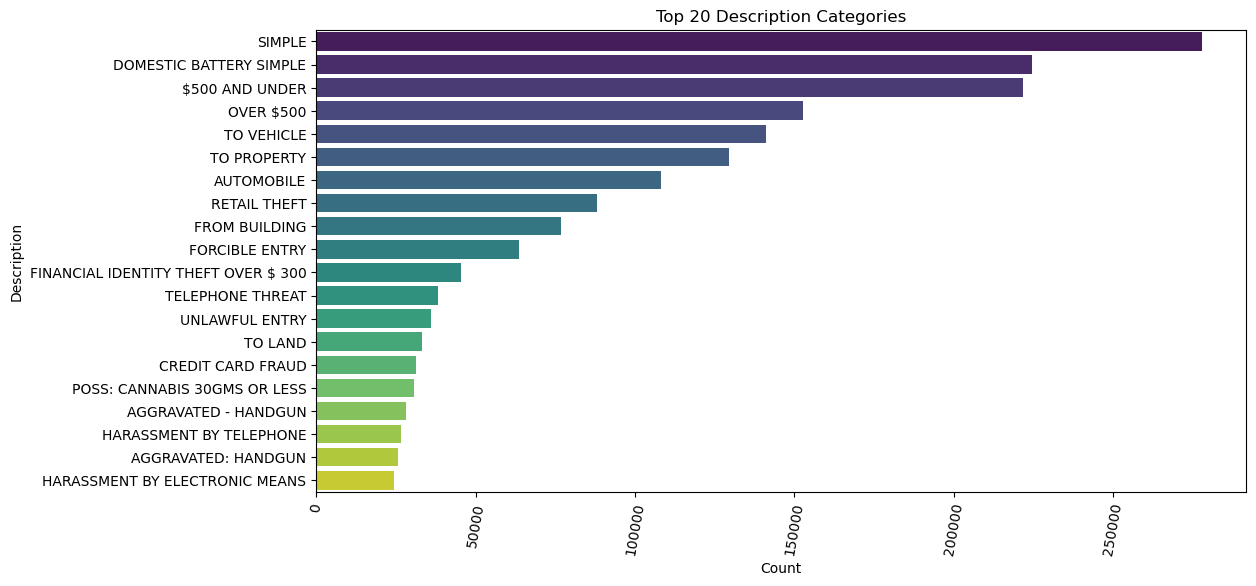

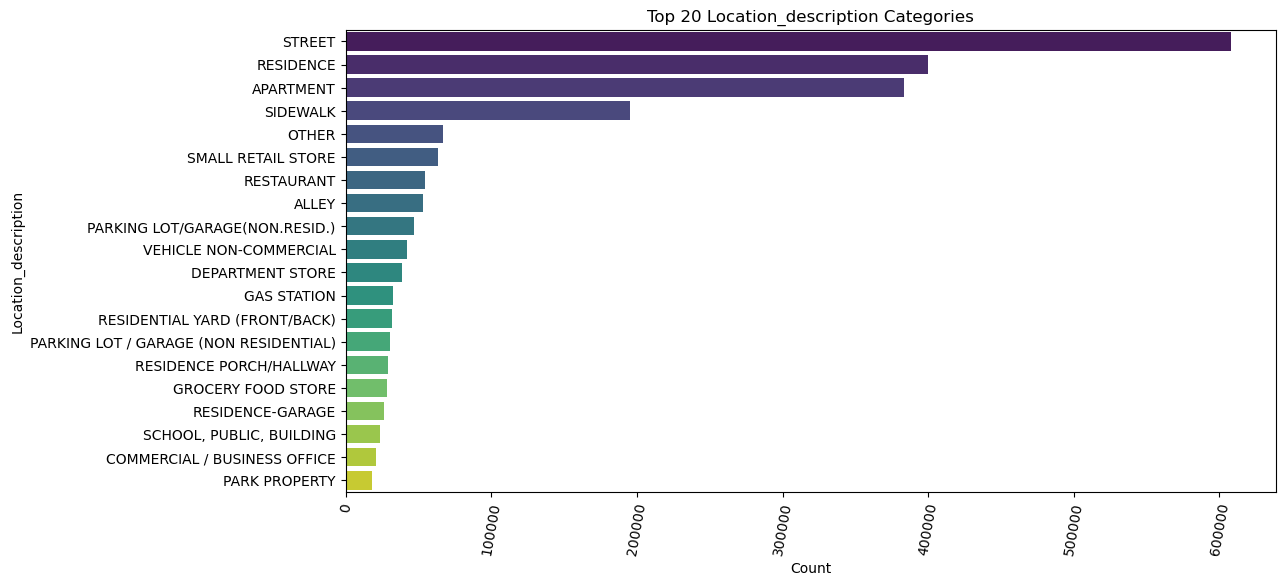

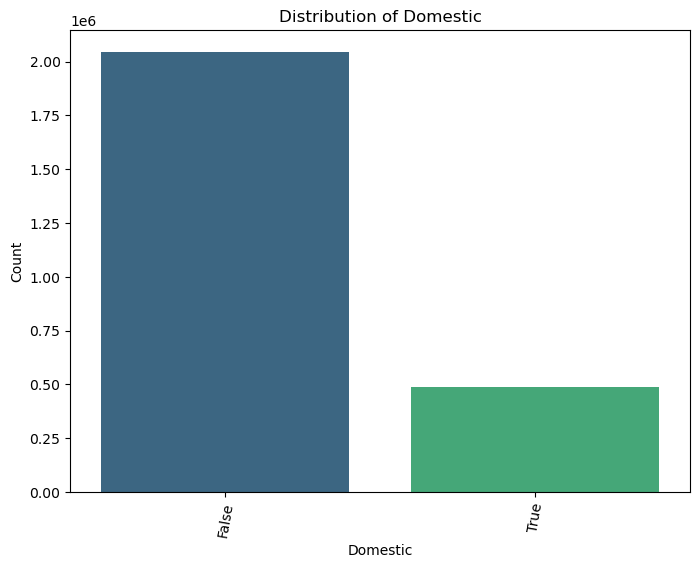

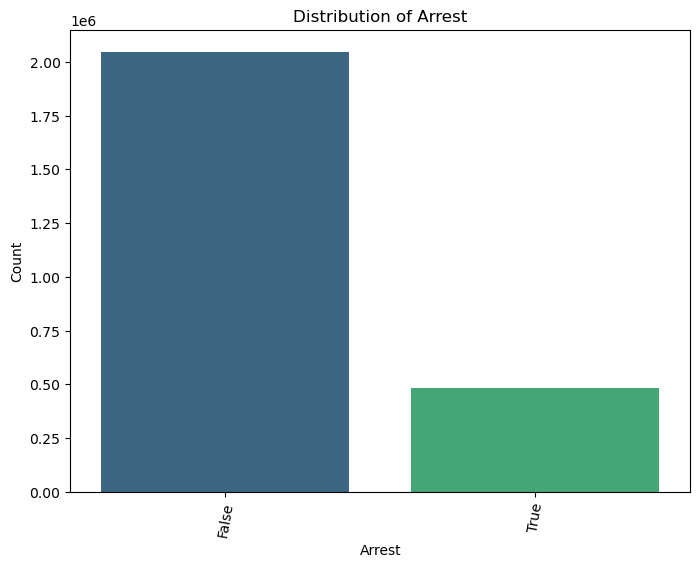

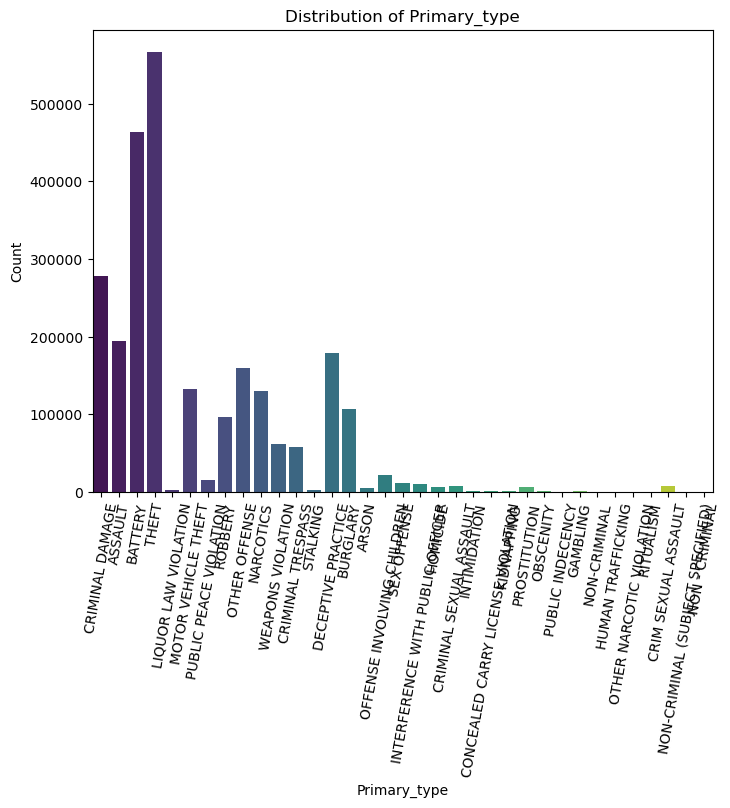

In [140]:
categorical_features = ['description', 'location_description', 'domestic', 'arrest', 'primary_type']

for feature in categorical_features:
    if feature in ['description', 'location_description']:
        # top 20 categories for 'description' and 'location_description'
        top_categories = crime_df[feature].value_counts().head(20)
        plt.figure(figsize=(12, 6))
        sns.countplot(y=feature, data=crime_df, order=top_categories.index, palette='viridis')
        plt.title(f'Top 20 {feature.capitalize()} Categories')
        plt.xlabel('Count')
        plt.ylabel(feature.capitalize())
        plt.xticks(rotation=80)
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature, data=crime_df, palette='viridis')
        plt.title(f'Distribution of {feature.capitalize()}')
        plt.xlabel(feature.capitalize())
        plt.ylabel('Count')
        plt.xticks(rotation=80)
    plt.show()

##### Distribution of incidents per year <a id="distribution-incidents-year-crime"></a>

   year   count
0  2014  275812
1  2015  264823
2  2016  269865
3  2017  269138
4  2018  268954
5  2019  261410
6  2020  212307
7  2021  209044
8  2022  239158
9  2023  260626


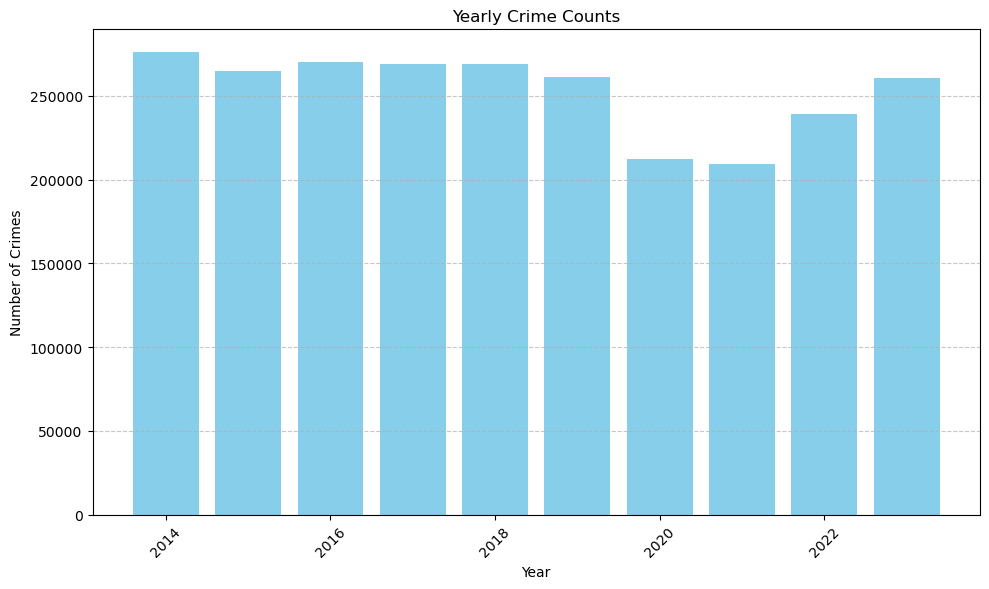

In [141]:
yearly_counts = crime_df.groupby('year').size().reset_index(name='count')
print(yearly_counts)

plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['year'], yearly_counts['count'], color='skyblue')
plt.title('Yearly Crime Counts')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### B. Property Data <a id="property-data-assessment"></a>

##### Initial observations <a id="initial-observations-property"></a>

In [142]:
property_df.tail(3)

,property_url,mls,mls_id,status,style,street,unit,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,primary_photo,alt_photos
314278,https://www.realtor.com/realestateandhomes-detail/8825700777,CHIL,11872777.0,SOLD,SINGLE_FAMILY,10229 S Vernon St,NaN,Chicago,IL,60628.0,3.0,3.0,NaN,2640.0,NaN,89.0,295000.0,2023-09-02,296000.0,2023-11-30,3750.0,112.0,41.708269,-87.612224,2.0,NaN,2.0,http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2705152004od-w480_h360_x2.webp?w=1080&q=75,"http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2705152004od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m3225286414od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m4237783002od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2825913852od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m3736544395od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2677788241od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m3470720672od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2431576780od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m860361501od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2403018361od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m1966126677od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m979331164od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2073946386od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m2343116453od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m1455262214od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/c723a4ef5ffd5cfcbdd3f7ed47c6f337l-m589310924od-w480_h360_x2.webp?w=1080&q=75"
314279,https://www.realtor.com/realestateandhomes-detail/7722955865,CHIL,11924322.0,SOLD,SINGLE_FAMILY,2749 W Chicago Ave,NaN,Chicago,IL,60622.0,2.0,1.0,NaN,1600.0,1892.0,25.0,175000.0,2023-11-05,150000.0,2023-11-30,2500.0,94.0,41.895371,-87.696143,2.0,NaN,NaN,http://ap.rdcpix.com/4a384b0ccc25bd778e995b58ff624f6dl-b642729938od-w480_h360_x2.webp?w=1080&q=75,"http://ap.rdcpix.com/4a384b0ccc25bd778e995b58ff624f6dl-b642729938od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/4a384b0ccc25bd778e995b58ff624f6dl-b2741490986od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/4a384b0ccc25bd778e995b58ff624f6dl-b3995223241od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/4a384b0ccc25bd778e995b58ff624f6dl-b1256600261od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/4a384b0ccc25bd778e995b58ff624f6dl-b2142886661od-w480_h360_x2.webp?w=1080&q=75"
314280,https://www.realtor.com/realestateandhomes-detail/7838829376,CHIL,11896113.0,SOLD,CONDOS,4250 N Marine Dr,Apt 312,Chicago,IL,60613.0,0.0,1.0,NaN,525.0,1963.0,56.0,90000.0,2023-10-05,90000.0,2023-11-30,NaN,171.0,41.960139,-87.647692,29.0,417.0,1.0,http://ap.rdcpix.com/94c81487230bf48e7972329285f2686bl-m4003064434od-w480_h360_x2.webp?w=1080&q=75,"http://ap.rdcpix.com/94c81487230bf48e7972329285f2686bl-m4003064434od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/94c81487230bf48e7972329285f2686bl-m2445061497od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/94c81487230bf48e7972329285f2686bl-m3186384785od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/94c81487230bf48e7972329285f2686bl-m1115678005od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/94c81487230bf48e7972329285f2686bl-m779680056od-w480_h360_x2.webp?w=1080&q=75, http://ap.rdcpix.com/94c81487230bf48e7972329285f2686bl-m117201

In [143]:
property_df.dtypes

property_url       object
mls                object
mls_id             object
status             object
style              object
street             object
unit               object
city               object
state              object
zip_code          float64
beds              float64
full_baths        float64
half_baths        float64
sqft              float64
year_built        float64
days_on_mls       float64
list_price        float64
list_date          object
sold_price        float64
last_sold_date     object
lot_sqft          float64
price_per_sqft    float64
latitude          float64
longitude         float64
stories           float64
hoa_fee           float64
parking_garage    float64
primary_photo      object
alt_photos         object
dtype: object

In [144]:
property_df.describe()

,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,sold_price,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
count,314274.000000,224511.000000,231939.000000,61680.000000,1.814870e+05,210894.000000,121307.000000,1.666740e+05,3.142770e+05,1.459070e+05,179339.000000,313371.000000,313371.000000,182935.000000,101654.000000,172165.000000
mean,60629.054993,3.423725,2.021316,1.108933,1.946548e+03,1947.734421,89.620343,4.173810e+05,7.245008e+05,3.103797e+04,240.327653,41.881243,-87.674319,5.885325,335.025292,2.136741
std,27.552410,3.269932,2.656779,0.586564,8.534422e+03,40.498539,84.396915,4.482208e+05,5.965420e+06,2.081763e+06,1151.456993,0.087899,0.324413,12.582289,536.501139,17.192986
min,60005.000000,0.000000,1.000000,0.000000,0.000000e+00,1615.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,32.720909,-115.986181,0.000000,0.000000,1.000000
25%,60614.000000,2.000000,1.000000,1.000000,1.089000e+03,1915.000000,46.000000,1.990000e+05,1.900000e+05,3.125000e+03,129.000000,41.822988,-87.706789,2.000000,0.000000,1.000000
50%,60628.000000,3.000000,2.000000,1.000000,1.472000e+03,1947.000000,66.000000,3.100000e+05,3.080000e+05,3.750000e+03,206.000000,41.898367,-87.664078,2.000000,237.000000,2.000000
75%,60643.000000,4.000000,2.000000,1.000000,2.200000e+03,1983.000000,104.000000,4.949000e+05,4.900000e+05,4.620000e+03,297.000000,41.944257,-87.635449,3.000000,453.000000,2.000000
max,61250.000000,999.000000,999.000000,64.000000,1.923400e+06,2023.000000,2144.000000,3.000000e+07,3.673000e+08,2.766060e+08,308000.000000,46.045219,87.686370,999.000000,42545.000000,999.000000


##### Distribution of numerical variables within upper and lower bounds <a id="distribution-numerical-variables-property"></a>

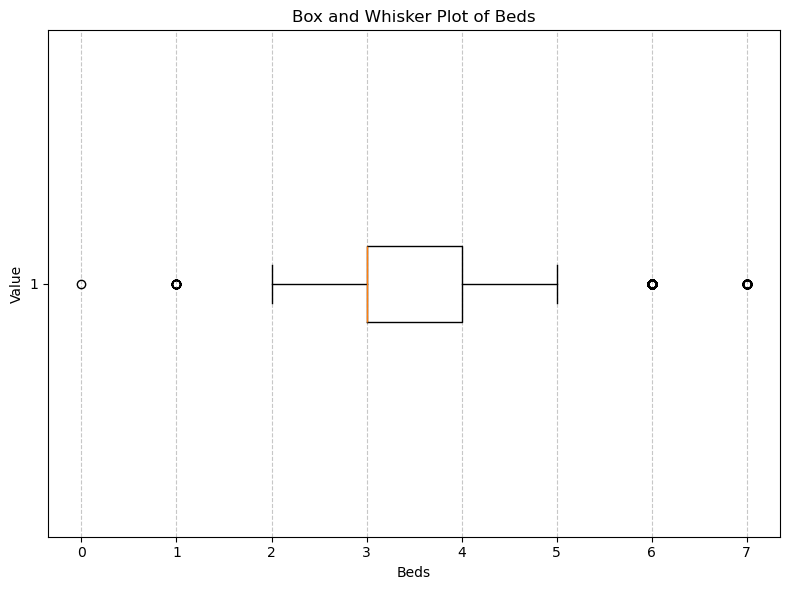

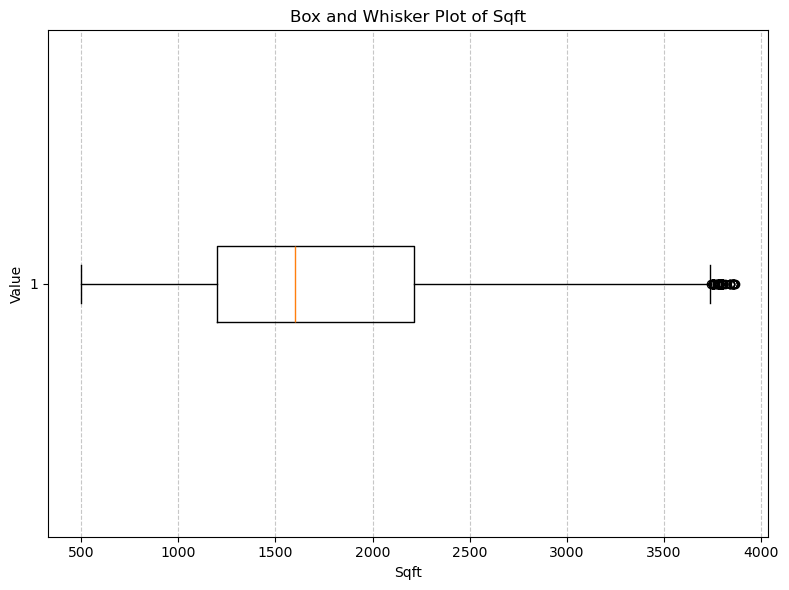

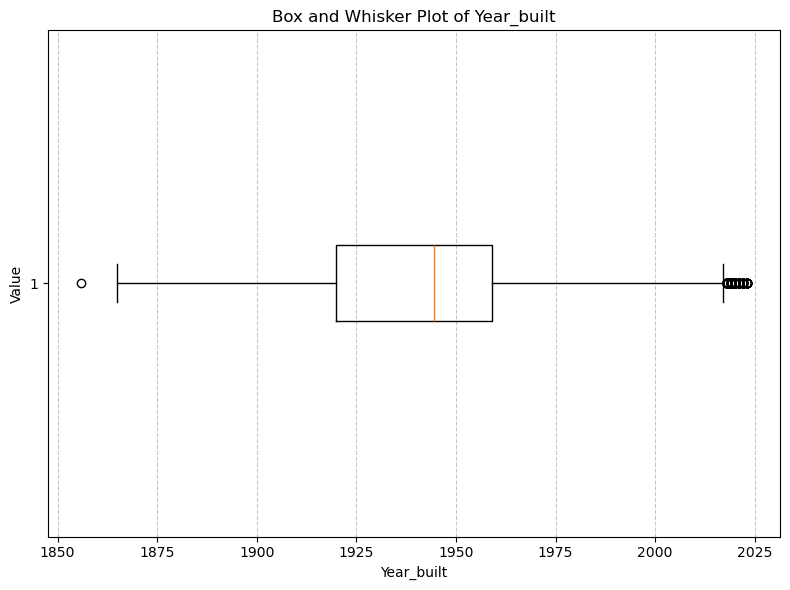

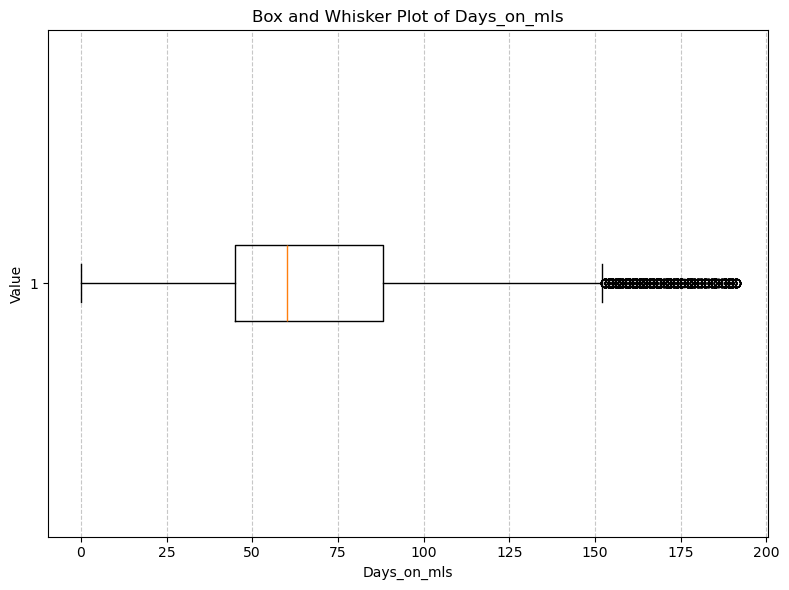

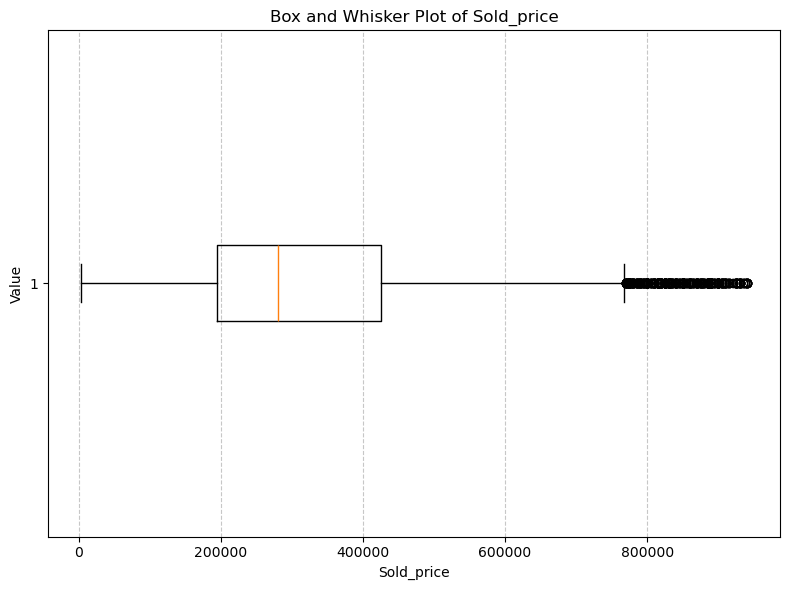

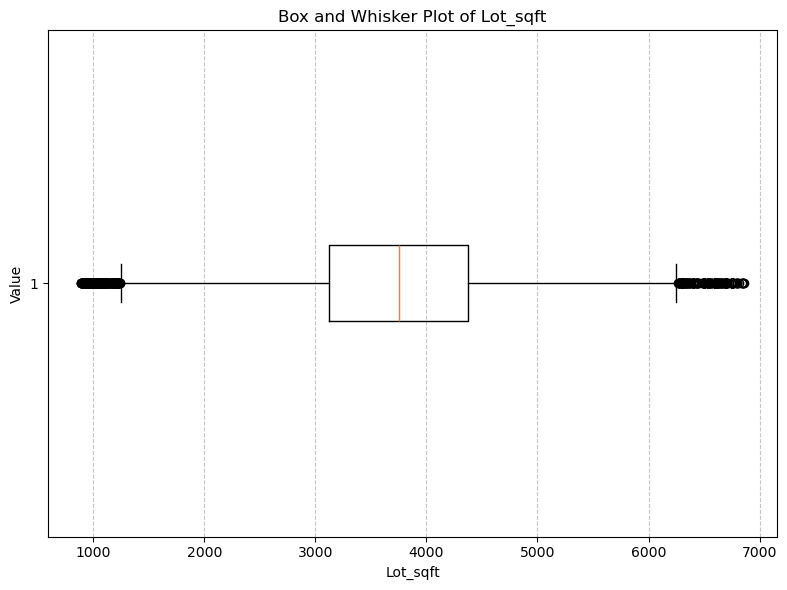

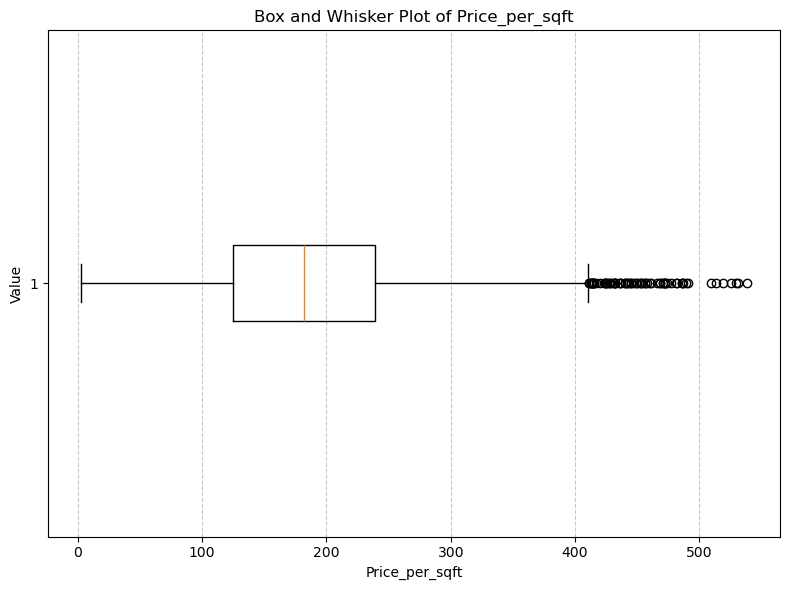

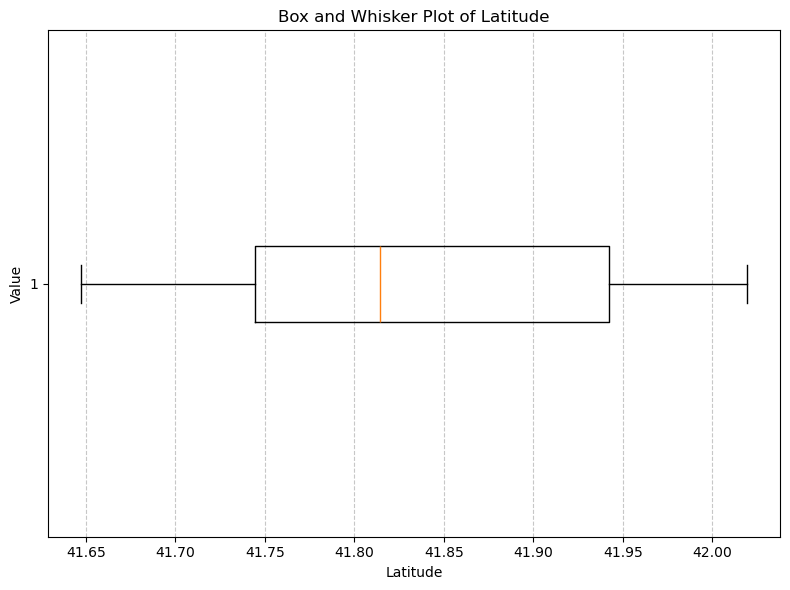

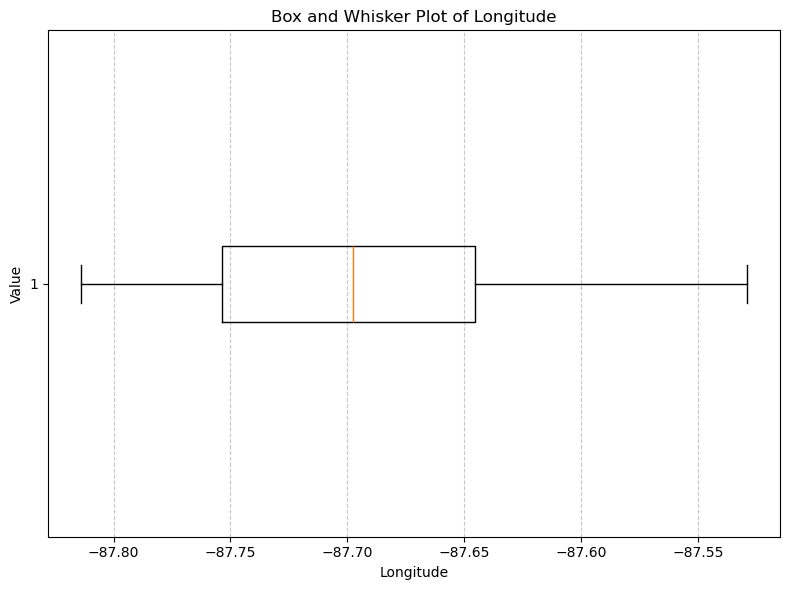

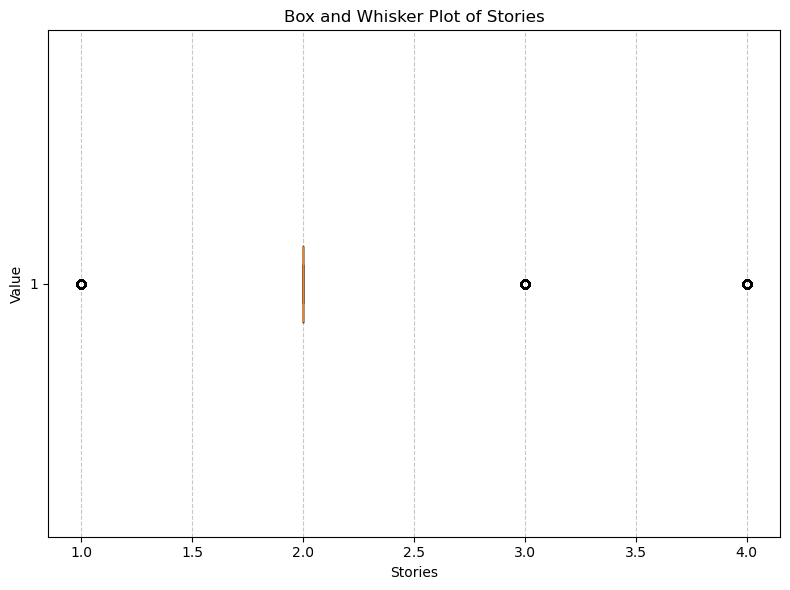

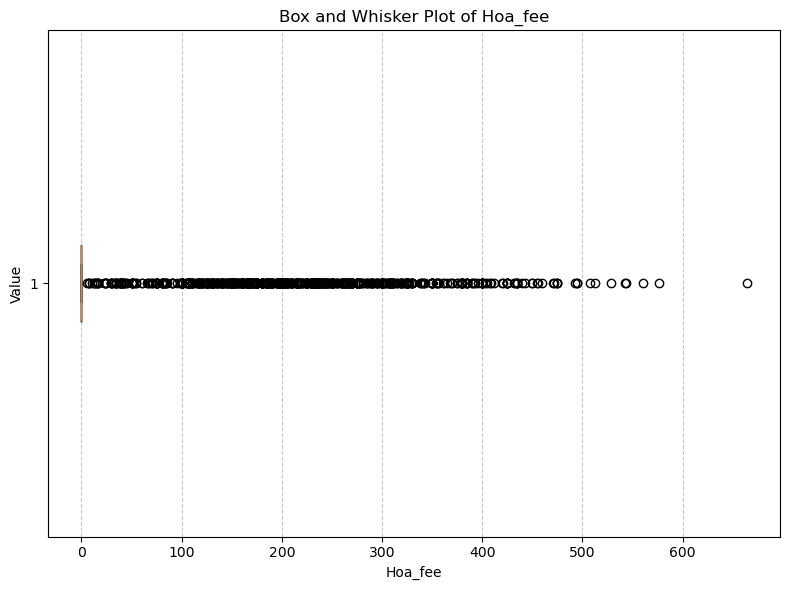

In [145]:
filtered_property_df = property_df.copy()

numerical_vars = ['beds', 'sqft', 'year_built', 'days_on_mls', 'sold_price', 
                  'lot_sqft', 'price_per_sqft', 'latitude', 'longitude', 
                  'stories', 'hoa_fee']

for var in numerical_vars:
    q1 = property_df[var].quantile(0.25)
    q3 = property_df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_property_df = filtered_property_df[(filtered_property_df[var] >= lower_bound) & (filtered_property_df[var] <= upper_bound)]

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.boxplot(filtered_property_df[var].dropna(), vert=False)
    plt.title(f'Box and Whisker Plot of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Value')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


##### Distribution of categorical features <a id="distribution-categorical-features-property"></a>

Frequency of Categories in style:
style
SINGLE_FAMILY                  91553
CONDO                          74646
CONDOS                         55344
MULTI_FAMILY                   42749
CONDO_TOWNHOME_ROWHOME_COOP    25501
OTHER                          12647
TOWNHOMES                       7530
LAND                            3730
COMMERCIAL                        98
FARM                               3
MOBILE                             2
DUPLEX_TRIPLEX                     1
Name: count, dtype: int64


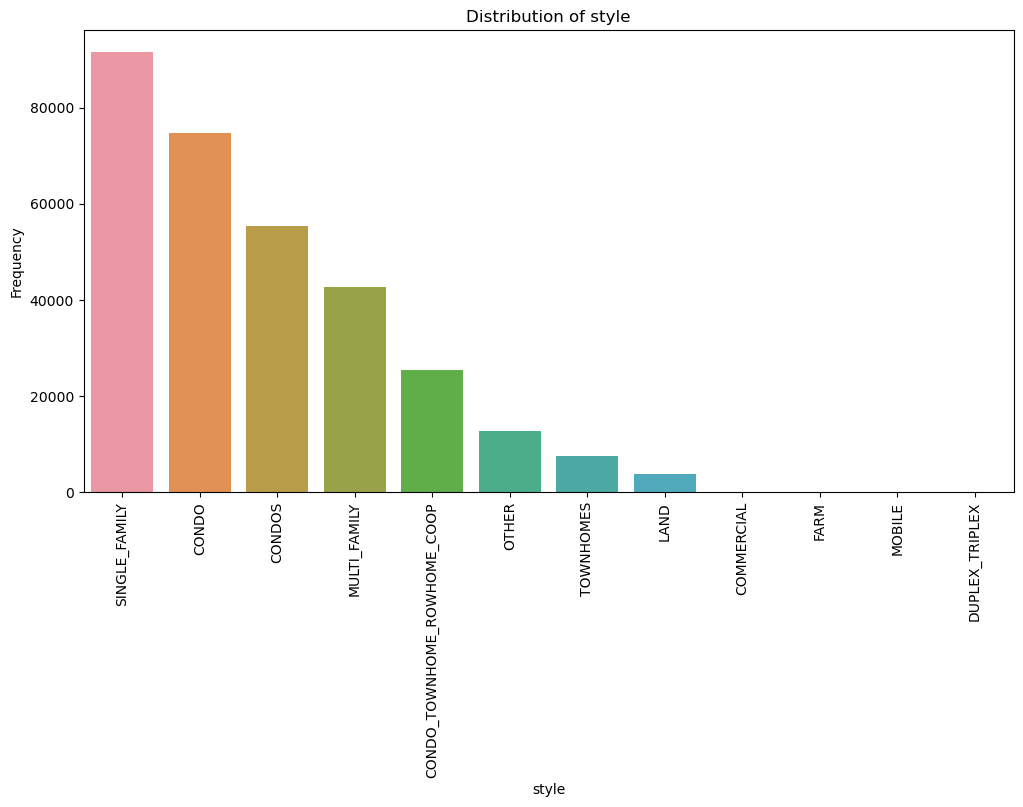

In [146]:
categorical_vars = ['style']

for var in categorical_vars:
    print(f"Frequency of Categories in {var}:")
    print(property_df[var].value_counts())

    plt.figure(figsize=(12, 6))
    sns.countplot(data=property_df, x=var, order=property_df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

##### Sold Price <a id="sold-price"></a>

We use sold price instead of list price because later we will find list price and list and list date to have a significant amount of missing values.

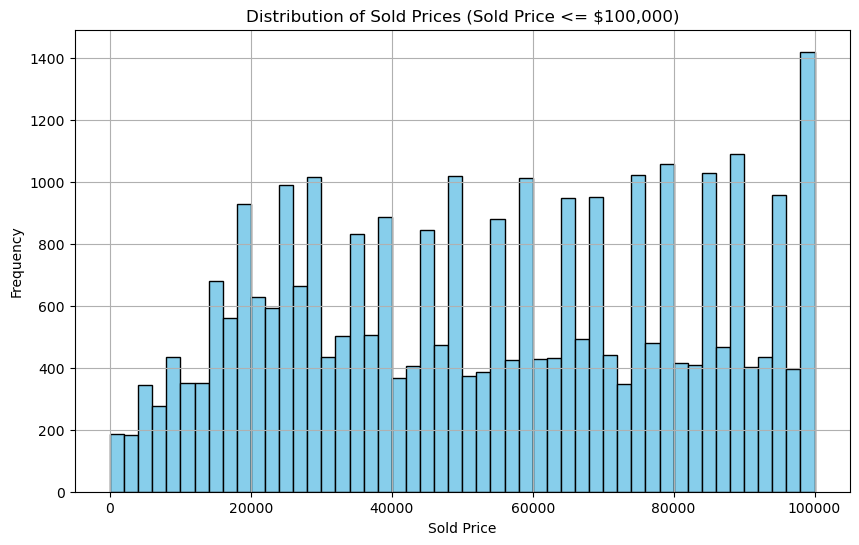

In [147]:
filtered_property_df = property_df[property_df['sold_price'] <= 100000]

plt.figure(figsize=(10, 6))
plt.hist(filtered_property_df['sold_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sold Prices (Sold Price <= $100,000)')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('sample_plot.png')
plt.show()


There is a somewhat irregular distribution of sold prices across the different price ranges. Unlike a typical bell curve or normal distribution, the sold prices are spread across various bins with varying frequencies, indicating no single dominant price range but rather several clusters.

In [148]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', None)

In [149]:
houses_sold_below_20k = property_df[property_df['sold_price'] < 20000]

houses_sold_below_20k.head(10)

,property_url,mls,mls_id,status,style,street,unit,city,state,zip_code,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-detail/8324624811,CHIL,07809395,SOLD,LAND,1053 N Lawndale Ave,NaN,Chicago,IL,60651.0,NaN,NaN,NaN,NaN,NaN,1024.0,14900.0,2011-05-17,1.0,2014-03-06,NaN,NaN,41.900670,-87.718637,NaN,NaN,NaN,http://p.rdcpix.com/v01/leb733843-m0od-w480_h360_x2.webp?w=1080&q=75,http://p.rdcpix.com/v01/leb733843-m0od-w480_h360_x2.webp?w=1080&q=75
1,https://www.realtor.com/realestateandhomes-detail/7430414029,CHIL,08522354,SOLD,SINGLE_FAMILY,6009 S Hermitage Ave,NaN,Chicago,IL,60636.0,3.0,1.0,NaN,1122.0,1910.0,43.0,2.0,2014-01-22,2.0,2014-03-06,3093.0,0.0,41.784561,-87.667639,1.0,NaN,NaN,NaN,NaN
2,https://www.realtor.com/realestateandhomes-detail/7970105187,CHIL,08424362,SOLD,SINGLE_FAMILY,1646 S Homan Ave,NaN,Chicago,IL,60623.0,3.0,1.0,NaN,770.0,1903.0,199.0,5000.0,2013-08-19,5000.0,2014-03-06,NaN,6.0,41.857665,-87.710643,NaN,NaN,NaN,http://p.rdcpix.com/v01/l77e15844-m0od-w480_h360_x2.webp?w=1080&q=75,http://p.rdcpix.com/v01/l77e15844-m0od-w480_h360_x2.webp?w=1080&q=75
17,https://www.realtor.com/realestateandhomes-detail/8578636505,CHIL,08490450,SOLD,LAND,5614 S LA Salle St,NaN,Chicago,IL,60621.0,NaN,NaN,NaN,NaN,NaN,108.0,1427.0,2013-11-18,1427.0,2014-03-06,NaN,NaN,41.792231,-87.629601,NaN,NaN,NaN,http://p.rdcpix.com/v01/ldbf87844-m0od-w480_h360_x2.webp?w=1080&q=75,"http://p.rdcpix.com/v01/ldbf87844-m0od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/ldbf87844-m1od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/ldbf87844-m2od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/ldbf87844-m3od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/ldbf87844-m4od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/ldbf87844-m5od-w480_h360_x2.webp?w=1080&q=75"
19,https://www.realtor.com/realestateandhomes-detail/8090288645,CHIL,08061758,SOLD,LAND,6400 S May Ave,NaN,Chicago,IL,60621.0,NaN,NaN,NaN,NaN,NaN,667.0,4000.0,2012-05-08,1.0,2014-03-06,2614.0,NaN,41.777679,-87.653589,NaN,NaN,NaN,http://p.rdcpix.com/v01/l1131b343-m0od-w480_h360_x2.webp?w=1080&q=75,http://p.rdcpix.com/v01/l1131b343-m0od-w480_h360_x2.webp?w=1080&q=75
32,https://www.realtor.com/realestateandhomes-detail/7956277779,CHIL,07585409,SOLD,LAND,1239 W 63rd St,NaN,Chicago,IL,60636.0,NaN,NaN,NaN,NaN,NaN,1326.0,11000.0,2010-07-19,1.0,2014-03-06,NaN,NaN,41.779328,-87.656017,NaN,NaN,NaN,http://p.rdcpix.com/v01/l3f95ca42-m0od-w480_h360_x2.webp?w=1080&q=75,http://p.rdcpix.com/v01/l3f95ca42-m0od-w480_h360_x2.webp?w=1080&q=75
38,https://www.realtor.com/realestateandhomes-detail/8084088742,CHIL,08433718,SOLD,SINGLE_FAMILY,8122 S Muskegon Ave,NaN,Chicago,IL,60617.0,4.0,2.0,NaN,1582.0,1885.0,188.0,6520.0,2013-08-30,6099.0,2014-03-06,NaN,4.0,41.747495,-87.555591,1.0,NaN,2.0,http://p.rdcpix.com/v01/l87485d44-m0od-w480_h360_x2.webp?w=1080&q=75,"http://p.rdcpix.com/v01/l87485d44-m0od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m1od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m2od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m3od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m4od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m5od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m6od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m7od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m8od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m9od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m10od-w480_h360_x2.webp?w=1080&q=75, http://p.rdcpix.com/v01/l87485d44-m11od-w480_h360_x2.webp?w=1080&q=75"
40,https://www.realtor.com/realestateandhomes-detail/8944907710,CHIL,08458330,SOLD,MULTI_FAMILY,3009 W Jack

The small sold prices, although very cheap, checks out indicating no data entry / import errors.

### Data cleaning <a id="#data-cleaning-2"></a>

#### A. Crime Data Cleaning <a id="crime-data-cleaning"></a>

##### Columns to remove <a id="columns-remove-crime"></a>

The following columns provide little insight in our initial analysis

In [150]:
columns_to_remove = ['case_number', 'block', 'iucr', 'beat', 'district', 
                     'ward', 'x_coordinate', 'y_coordinate', 'updated_on', 'location']

crime_df = crime_df.drop(columns=columns_to_remove)

##### Handling missing values <a id="handling-missing-values-crime"></a>

In [151]:
crime_df.shape

(2531137, 12)

In [152]:
total_rows = len(crime_df)

null_values = crime_df.isnull().sum()

percentage_missing = (null_values / total_rows) * 100

missing_percentage_df = pd.DataFrame({'Column Name': null_values.index, 'Missing Count': null_values.values, 'Percentage Missing': percentage_missing.values})

print(missing_percentage_df)

             Column Name  Missing Count  Percentage Missing
0                   date              0            0.000000
1               latitude          38196            1.509045
2            description              0            0.000000
3   location_description          11034            0.435931
4         community_area              2            0.000079
5                   year              0            0.000000
6               domestic              0            0.000000
7               fbi_code              0            0.000000
8              longitude          38196            1.509045
9           primary_type              0            0.000000
10                arrest              0            0.000000
11                    id              0            0.000000


Given the small percent of missing values in `latitude`, `location_description`, and `longitude`, we will remove these rows. 

In [153]:
crime_df = crime_df.dropna()

print(crime_df.shape) 

(2485721, 12)


##### Correcting data types and formats <a id="correcting-data-types-crime"></a>

In [154]:
crime_df.dtypes

date                     object
latitude                float64
description              object
location_description     object
community_area          float64
year                      int64
domestic                   bool
fbi_code                 object
longitude               float64
primary_type             object
arrest                     bool
id                        int64
dtype: object

In [155]:
crime_df['date'] = pd.to_datetime(crime_df['date'])

##### Handling duplicates <a id="handling-duplicates-crime"></a>

In [156]:
# check for duplicates
duplicates = crime_df[crime_df.duplicated()]

print("Duplicate Rows:")
print(duplicates)



Duplicate Rows:
Empty DataFrame
Columns: [date, latitude, description, location_description, community_area, year, domestic, fbi_code, longitude, primary_type, arrest, id]
Index: []


#### B. Property Data Cleaning <a id="property-data-cleaning"></a>

##### Columns to remove <a id="columns-remove-property"></a>


The following columns do not provide any additional insight. We are removing `zip_code` column as later on we will use latitude and longitude to determine which neighborhood each property maps with. 

In [157]:
columns_to_remove = ['mls', 'mls_id', 'status', 'street', 
                     'unit', 'city', 'state', 'zip_code', 'primary_photo', 'alt_photos']

property_df = property_df.drop(columns=columns_to_remove)

##### Standardizing values <a id="standardizing-values-property"></a>

In [158]:
# replace 'CONDOS' with 'CONDO' in the 'style' column
property_df['style'] = property_df['style'].replace('CONDOS', 'CONDO')

print(property_df['style'].value_counts())

style
CONDO                          129990
SINGLE_FAMILY                   91553
MULTI_FAMILY                    42749
CONDO_TOWNHOME_ROWHOME_COOP     25501
OTHER                           12647
TOWNHOMES                        7530
LAND                             3730
COMMERCIAL                         98
FARM                                3
MOBILE                              2
DUPLEX_TRIPLEX                      1
Name: count, dtype: int64


##### Handling missing values <a id="handling-missing-values-property"></a>

In [159]:
missing_values = property_df.isna().sum()

zero_values = (property_df == 0).sum()

missing_and_zero_values = missing_values + zero_values

total_values = len(property_df)  


percent_missing = (missing_values / total_values) * 100

percent_zero = (zero_values / total_values) * 100

result_df = pd.DataFrame({'Percent Missing': percent_missing, 'Percent Zero': percent_zero})

print(result_df)

                Percent Missing  Percent Zero
property_url           0.000000      0.000000
style                  0.151775      0.000000
beds                  28.563610      0.684419
full_baths            26.200120      0.000000
half_baths            80.374251      0.000318
sqft                  42.253270      0.683147
year_built            32.896357      0.000000
days_on_mls           61.401739      0.407915
list_price            46.966568      0.000000
list_date             46.935386      0.000000
sold_price             0.001273      0.000000
last_sold_date         0.000000      0.000000
lot_sqft              53.574349      0.000000
price_per_sqft        42.936735      0.007955
latitude               0.289550      0.000000
longitude              0.289550      0.000000
stories               41.792536      0.684738
hoa_fee               67.655060     11.007983
parking_garage        45.219406      0.000000


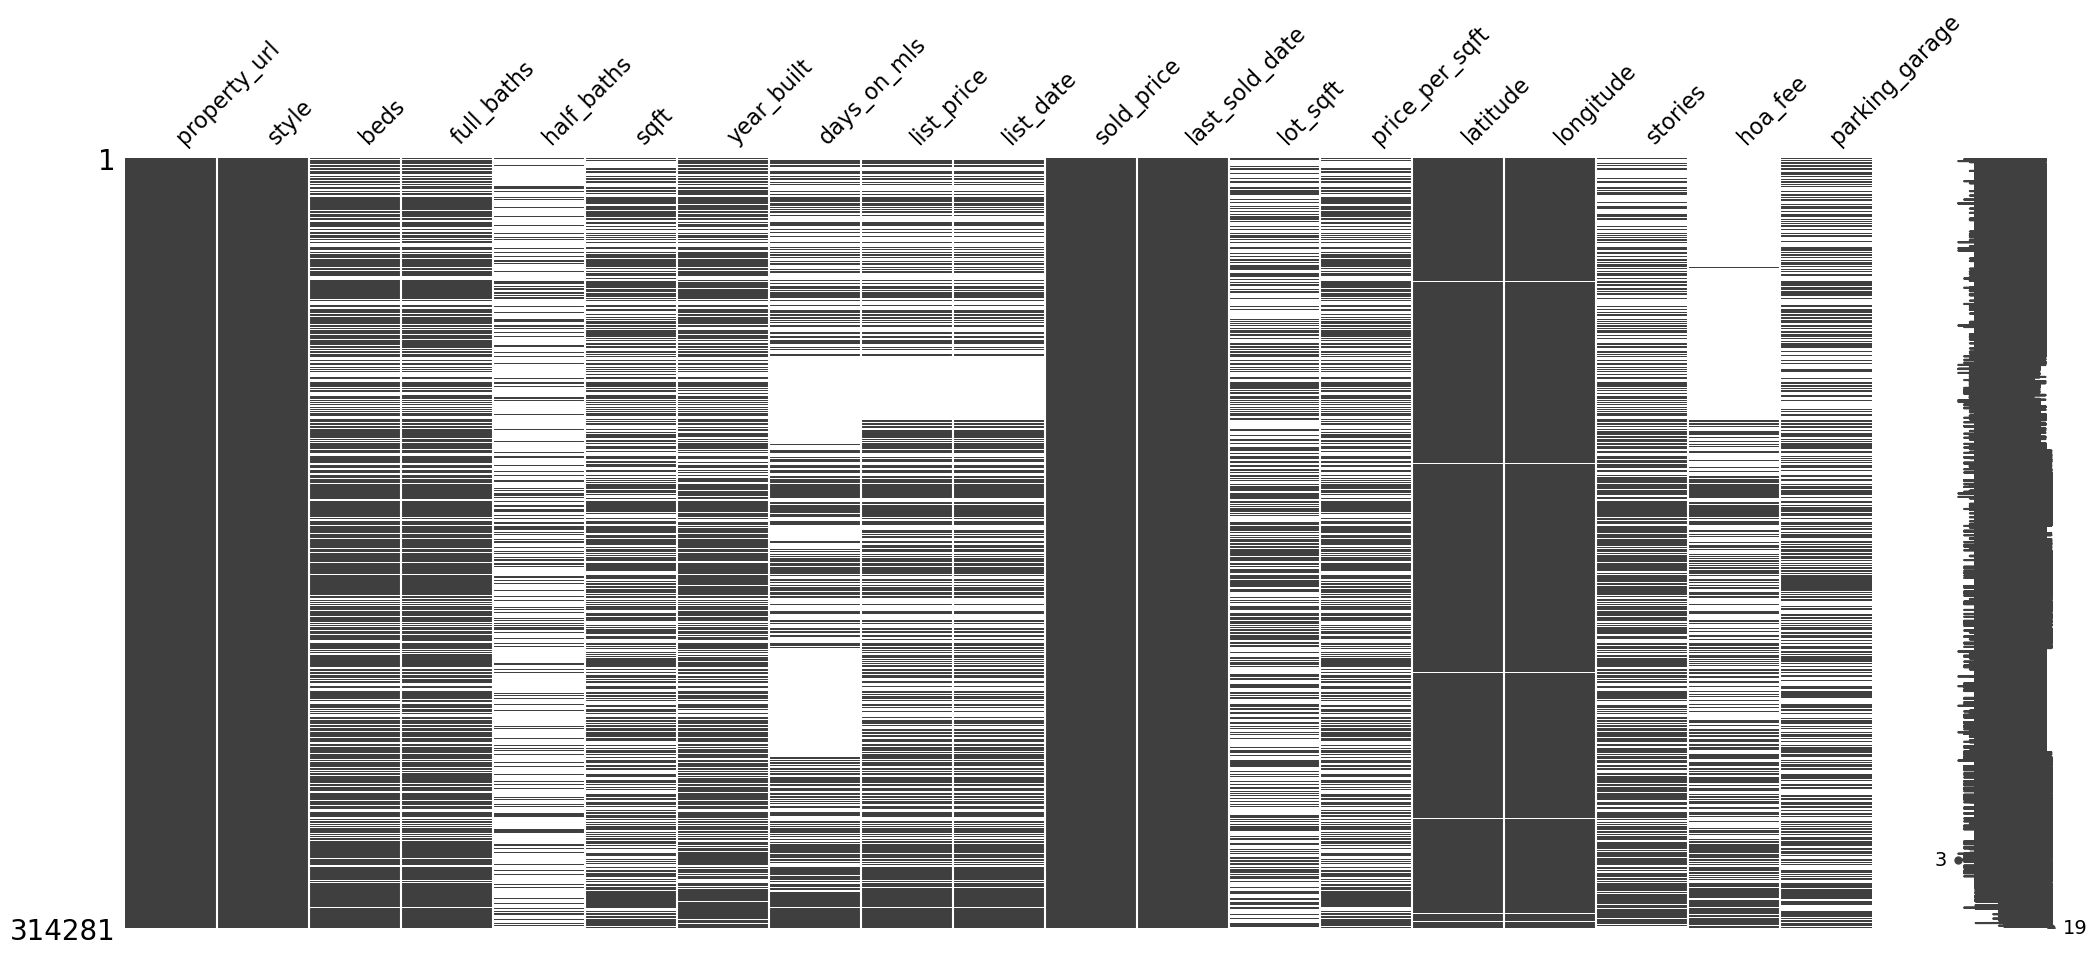

In [160]:
msno.matrix(property_df)
plt.show()

In [161]:
missing_beds = property_df[property_df['beds'].isnull()]

missing_beds

,property_url,style,beds,full_baths,half_baths,sqft,year_built,days_on_mls,list_price,list_date,sold_price,last_sold_date,lot_sqft,price_per_sqft,latitude,longitude,stories,hoa_fee,parking_garage
0,https://www.realtor.com/realestateandhomes-detail/8324624811,LAND,NaN,NaN,NaN,NaN,NaN,1024.0,14900.0,2011-05-17,1.0,2014-03-06,NaN,NaN,41.900670,-87.718637,NaN,NaN,NaN
4,https://www.realtor.com/realestateandhomes-detail/8656812441,CONDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142000.0,2014-03-06,NaN,NaN,41.828723,-87.678546,NaN,NaN,NaN
6,https://www.realtor.com/realestateandhomes-detail/8556070494,SINGLE_FAMILY,NaN,1.0,NaN,1388.0,1901.0,NaN,NaN,NaN,655000.0,2014-03-06,3125.0,472.0,41.957142,-87.679713,2.0,NaN,2.0
10,https://www.realtor.com/realestateandhomes-detail/8711158049,LAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38000.0,2014-03-06,3024.0,NaN,41.897707,-87.734074,NaN,NaN,NaN
12,https://www.realtor.com/realestateandhomes-detail/8175252610,CONDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2283500.0,2014-03-06,NaN,NaN,41.906606,-87.627104,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313898,https://www.realtor.com/realestateandhomes-detail/7117410193,LAND,NaN,NaN,NaN,NaN,NaN,58.0,45000.0,2023-10-07,41000.0,2023-12-04,3750.0,NaN,41.793955,-87.734562,NaN,0.0,NaN
313906,https://www.realtor.com/realestateandhomes-detail/8057415651,LAND,NaN,NaN,NaN,NaN,NaN,190.0,19900.0,2023-05-28,16000.0,2023-12-04,3049.0,NaN,41.896868,-87.770689,NaN,0.0,NaN
314109,https://www.realtor.com/realestateandhomes-detail/8731162368,LAND,NaN,NaN,NaN,NaN,2001.0,1276.0,30000.0,2020-06-03,23000.0,2023-12-01,NaN,NaN,41.894485,-87.639584,NaN,57.0,NaN
314204,https://www.realtor.com/realestateandhomes-detail/7635717883,LAND,NaN,NaN,NaN,NaN,1991.0,490.0,29900.0,2022-07-28,29000.0,2023-11-30,160.0,NaN,41.890381,-87.618134,NaN,58.0,NaN


**Key findings:**

***Columns to remove*** 
- For `days_on_mls`, `list_price`, `list_date` and `hoa_fee` have a large number and systematic missingness which can indicate deeper issues--such as certain types of properties not being fully listed or recorded in the database. These columns will be removed.
- The following columns have almost 50% of missing data: `lot_sqft`, `price_per_sqft`, `stories`, `parking_garage`. These columns will be removed. 
- We find `half_baths` with over 80% and `year_built` with 32% missing values. We decide to remove these columns. 

***Columns to keep*** 
- For `style`, `sold_price`, `last_sold_date`, `latitude` and `longitude` the proportion of missing data is small and missing completely at random. We decide to do a listwise deletion and remove rows with missing values.
- `sqft` is typically a critical value in real estate analysis because it's a primary factor in valueing properties and comparing property sizes. `beds`, `full_baths` are other fundamental variable in real estate that affects property's appeal, functionality, and value.
  
- For `sqft`, `beds`, `full_baths` we consider using multiple imputation or using regression models to predict missing values based on other variables (like property type, location, or price).


In [162]:
columns_to_check = ['style', 'sold_price', 'last_sold_date', 'latitude', 'longitude']

# perform listwise deletion
property_df = property_df.dropna(subset=columns_to_check)

In [163]:
columns_to_remove = ['days_on_mls', 'list_price', 'list_date', 'hoa_fee', 
                     'lot_sqft', 'price_per_sqft', 'stories', 'parking_garage', 'half_baths', 'year_built']

property_df = property_df.drop(columns=columns_to_remove)

In [164]:
property_df.head(5)

,property_url,style,beds,full_baths,sqft,sold_price,last_sold_date,latitude,longitude
0,https://www.realtor.com/realestateandhomes-detail/8324624811,LAND,NaN,NaN,NaN,1.0,2014-03-06,41.900670,-87.718637
1,https://www.realtor.com/realestateandhomes-detail/7430414029,SINGLE_FAMILY,3.0,1.0,1122.0,2.0,2014-03-06,41.784561,-87.667639
2,https://www.realtor.com/realestateandhomes-detail/7970105187,SINGLE_FAMILY,3.0,1.0,770.0,5000.0,2014-03-06,41.857665,-87.710643
3,https://www.realtor.com/realestateandhomes-detail/7464917401,MULTI_FAMILY,5.0,2.0,NaN,263000.0,2014-03-06,41.943861,-87.761011
4,https://www.realtor.com/realestateandhomes-detail/8656812441,CONDO,NaN,NaN,NaN,142000.0,2014-03-06,41.828723,-87.678546


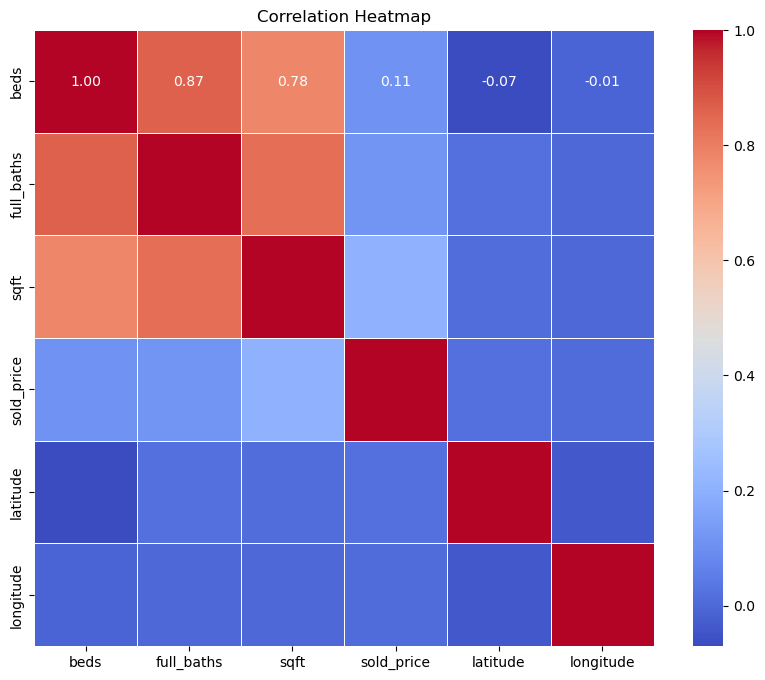

In [165]:
selected_columns = ['beds', 'full_baths', 'sqft', 'sold_price', 'latitude', 'longitude']
corr = property_df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- **Bedroom and Bathroom Relationship**: The strong positive correlations between the number of bedrooms, full baths, and half baths indicate that properties with more bedrooms tend to have more bathrooms.
- **Square Footage**: Square footage is positively correlated with the number of bedrooms, full baths, and half baths, suggesting that larger properties typically have more rooms and amenities.
- **Sold Price**: The weak correlations between the sold price and other features like the number of bedrooms, full baths, and half baths suggest that other factors may have a more significant impact on the property price. However, the moderate positive correlation with square footage indicates that larger properties tend to have higher sold prices.
- **Geographic Independence**: The low correlations of latitude and longitude with other features suggest that the geographic location (in terms of these coordinates) does not strongly influence the property characteristics in this dataset.

#### Handling outliers <a id="handling-outliers-property"></a>

##### Correcting data types and formats

In [166]:
property_df['last_sold_date'] = pd.to_datetime(property_df['last_sold_date'])

##### Sold Price - Descriptive Statistics 

In [167]:
print("Descriptive Statistics of Sold Price:")
print("Count: {:,.0f}".format(property_df['sold_price'].count()))
print("Mean: ${:,.2f}".format(property_df['sold_price'].mean()))
print("Median: ${:,.2f}".format(property_df['sold_price'].median()))
print("95th Percentile: ${:,.2f}".format(property_df['sold_price'].quantile(0.95)))
print("99th Percentile: ${:,.2f}".format(property_df['sold_price'].quantile(0.99)))
print("Maximum: ${:,.2f}".format(property_df['sold_price'].max()))

Descriptive Statistics of Sold Price:
Count: 312,913
Mean: $724,125.08
Median: $307,500.00
95th Percentile: $1,200,000.00
99th Percentile: $3,660,000.00
Maximum: $367,300,000.00


##### Sold Price split by General Properties and Luxury Properties 

Here we compare the dataset without the outliers and the outliers by itself where we have general properties of sold price that don't include prices beyond the 99% and luxury properties that are in top 1% of prices and compare the two.

In [168]:
# define the threshold for luxury properties
luxury_threshold = property_df['sold_price'].quantile(0.99)  

luxury_properties = property_df[property_df['sold_price'] >= luxury_threshold]
general_properties = property_df[property_df['sold_price'] < luxury_threshold]

In [169]:
# general properties
print("General Properties Statistics:")
general_sold_price_desc = general_properties['sold_price'].describe()
print("Count: {:,.0f}".format(general_sold_price_desc['count']))
print("Mean: ${:,.2f}".format(general_sold_price_desc['mean']))
print("Median: ${:,.2f}".format(general_sold_price_desc['50%']))
print("95th Percentile: ${:,.2f}".format(general_properties['sold_price'].quantile(0.95)))
print("99th Percentile: ${:,.2f}".format(general_properties['sold_price'].quantile(0.99)))
print("Maximum: ${:,.2f}".format(general_sold_price_desc['max']))
print()

# luxury properties
print("Luxury Properties Statistics:")
luxury_sold_price_desc = luxury_properties['sold_price'].describe()
print("Count: {:,.0f}".format(luxury_sold_price_desc['count']))
print("Mean: ${:,.2f}".format(luxury_sold_price_desc['mean']))
print("Median: ${:,.2f}".format(luxury_sold_price_desc['50%']))
print("95th Percentile: ${:,.2f}".format(luxury_properties['sold_price'].quantile(0.95)))
print("99th Percentile: ${:,.2f}".format(luxury_properties['sold_price'].quantile(0.99)))
print("Maximum: ${:,.2f}".format(luxury_sold_price_desc['max']))

General Properties Statistics:
Count: 309,779
Mean: $403,397.12
Median: $305,000.00
95th Percentile: $1,090,000.00
99th Percentile: $2,062,500.00
Maximum: $3,650,000.00

Luxury Properties Statistics:
Count: 3,134
Mean: $32,426,353.84
Median: $9,568,000.00
95th Percentile: $110,718,000.00
99th Percentile: $256,852,960.00
Maximum: $367,300,000.00


We decide to remove sold prices above the 99th percentile (above $3.5 million) for several reasons:
- To improve normality 
- Avoid overfitting
- More represenative of typical cases 
- Reduction in variance 
- Ensuring fair analysis

Removing outliers results in a 248,821(USD) reduction in the mean sold average from 655,000(USD) to 406,000(USD) with median price mostly unchanged.

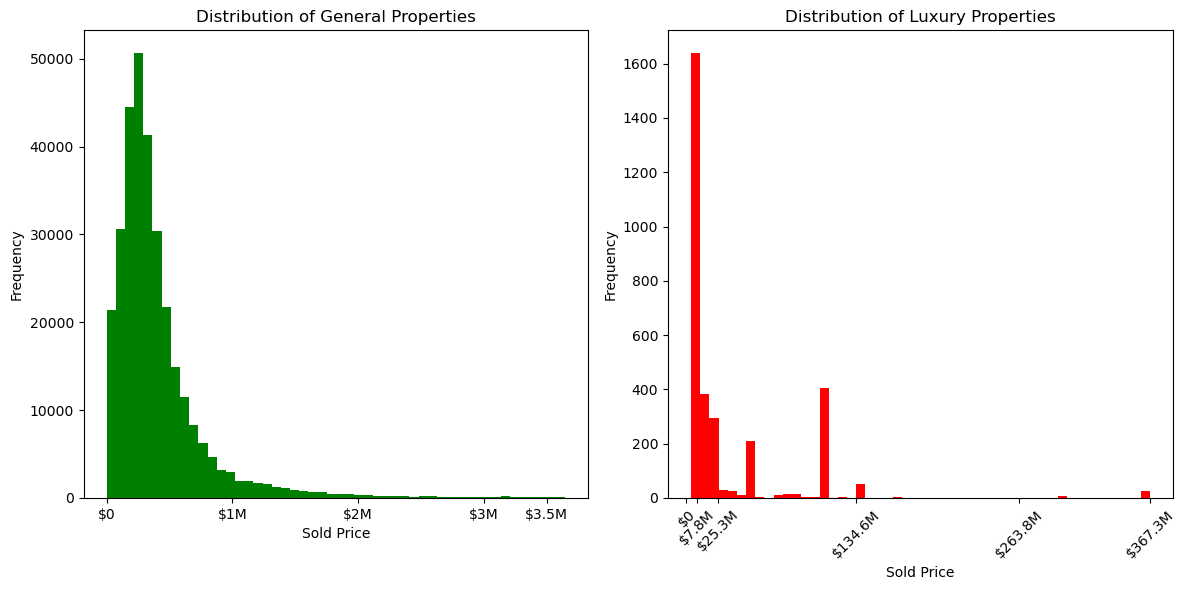

In [170]:
general_tick_values = [0, 1e6, 2e6, 3e6, 3.5e6]  
general_tick_labels = ['$0', '$1M', '$2M', '$3M', '$3.5M']

luxury_tick_values = [0, 8000000, 25345137.70, 134600000, 263814040, 367300000]  
luxury_tick_labels = ['$0', '$7.8M', '$25.3M', '$134.6M', '$263.8M', '$367.3M']  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(general_properties['sold_price'], bins=50, color='green')
plt.title('Distribution of General Properties')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.xticks(general_tick_values, general_tick_labels)  

plt.subplot(1, 2, 2)
plt.hist(luxury_properties['sold_price'], bins=50, color='red')
plt.title('Distribution of Luxury Properties')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.xticks(luxury_tick_values, luxury_tick_labels, rotation=45)  

plt.tight_layout()
plt.show()

In [171]:
zero_counts = (general_properties == 0).sum()

print("Number of zeros in each column:")
print(zero_counts)


Number of zeros in each column:
property_url         0
style                0
beds              2144
full_baths           0
sqft              2064
sold_price           0
last_sold_date       0
latitude             0
longitude            0
dtype: int64


In [172]:
null_counts = general_properties.isnull().sum()
print(null_counts)


property_url           0
style                  0
beds               86411
full_baths         79057
sqft              129590
sold_price             0
last_sold_date         0
latitude               0
longitude              0
dtype: int64


In [173]:
general_properties = general_properties[(general_properties['sqft'] != 0) & (general_properties['sqft'] != 1) & (general_properties['sqft'] != 2)]

In [174]:
# filter out rows where the number of beds or full baths exceeds 10
impute_property_df = general_properties[(general_properties['beds'] <= 10) & (general_properties['full_baths'] <= 10)]

In [175]:
null_counts = impute_property_df.isnull().sum()
print(null_counts)

property_url          0
style                 0
beds                  0
full_baths            0
sqft              54120
sold_price            0
last_sold_date        0
latitude              0
longitude             0
dtype: int64


### Applying mean,median, and regression impuation to the `beds`, `full_baths`. `sqft` <a id="#applying-imputation-beds-sqft"></a>

In [177]:
train_df, test_df = train_test_split(impute_property_df[['beds', 'full_baths', 'sqft']], test_size=0.2, random_state=42)

for col in ['beds', 'full_baths', 'sqft']:
    missing_indices = np.random.choice(test_df.index, size=int(len(test_df) * 0.3), replace=False)
    test_df.loc[missing_indices, col] = np.nan

In [178]:
# training model for predicting 'beds' using 'full_baths' and 'sqft'
train_non_missing_beds = train_df.dropna(subset=['full_baths', 'beds', 'sqft'])
beds_model = LinearRegression()
beds_model.fit(train_non_missing_beds[['full_baths', 'sqft']], train_non_missing_beds['beds'])

# predicting missing 'beds' where 'full_baths' and 'sqft' are available (non-NaN)
missing_beds = test_df[test_df['beds'].isnull() & test_df['full_baths'].notna() & test_df['sqft'].notna()]
predicted_beds = beds_model.predict(missing_beds[['full_baths', 'sqft']])
test_df.loc[missing_beds.index, 'beds'] = predicted_beds

# training model for predicting 'full_baths' using 'beds' and 'sqft'
train_non_missing_baths = train_df.dropna(subset=['beds', 'full_baths', 'sqft'])
baths_model = LinearRegression()
baths_model.fit(train_non_missing_baths[['beds', 'sqft']], train_non_missing_baths['full_baths'])

# predicting missing 'full_baths' where 'beds' and 'sqft' are available (non-NaN)
missing_baths = test_df[test_df['full_baths'].isnull() & test_df['beds'].notna() & test_df['sqft'].notna()]
predicted_baths = baths_model.predict(missing_baths[['beds', 'sqft']])
test_df.loc[missing_baths.index, 'full_baths'] = predicted_baths

# training model for predicting 'sqft' using 'beds' and 'full_baths'
train_non_missing_sqft = train_df.dropna(subset=['beds', 'full_baths', 'sqft'])
sqft_model = LinearRegression()
sqft_model.fit(train_non_missing_sqft[['beds', 'full_baths']], train_non_missing_sqft['sqft'])

# predicting missing 'sqft' where 'beds' and 'full_baths' are available (non-NaN)
missing_sqft = test_df[test_df['sqft'].isnull() & test_df['beds'].notna() & test_df['full_baths'].notna()]
predicted_sqft = sqft_model.predict(missing_sqft[['beds', 'full_baths']])
test_df.loc[missing_sqft.index, 'sqft'] = predicted_sqft


### Validation: Cross-Validation

In [179]:
X_beds = train_non_missing_beds[['full_baths', 'sqft']]
y_beds = train_non_missing_beds['beds']
beds_model_cv_scores = cross_val_score(LinearRegression(), X_beds, y_beds, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE for predicting beds:", -beds_model_cv_scores.mean())

X_baths = train_non_missing_baths[['beds', 'sqft']]
y_baths = train_non_missing_baths['full_baths']
baths_model_cv_scores = cross_val_score(LinearRegression(), X_baths, y_baths, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE for predicting full baths:", -baths_model_cv_scores.mean())

X_sqft = train_non_missing_sqft[['beds', 'full_baths']]
y_sqft = train_non_missing_sqft['sqft']
sqft_model_cv_scores = cross_val_score(LinearRegression(), X_sqft, y_sqft, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE for predicting sqft:", -sqft_model_cv_scores.mean())

Cross-validation MSE for predicting beds: 1.1646246484736456
Cross-validation MSE for predicting full baths: 0.3589924497117198
Cross-validation MSE for predicting sqft: 477628.13787422766


The cross-validation MSE values indicate that the models for predicting beds and full_baths perform reasonably well. However, the MSE for sqft is significantly higher, suggesting that predicting sqft might be more challenging or that the relationship between sqft and the other variables is more complex.


### Assumptions: Verify Linear Relationships

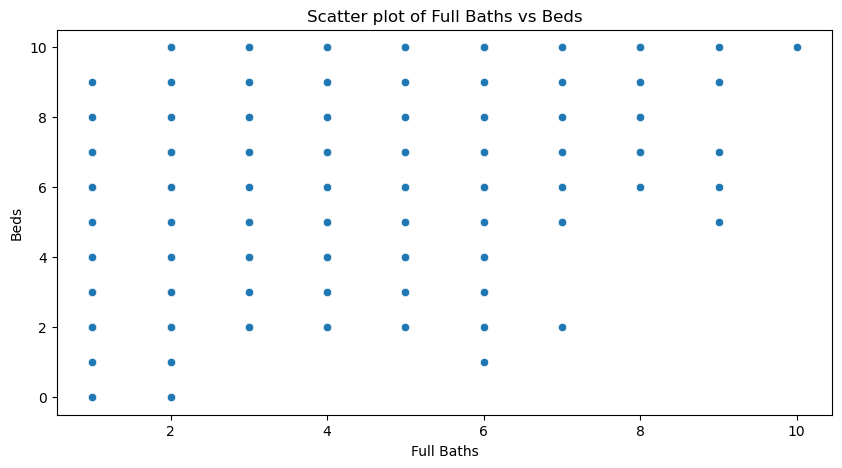

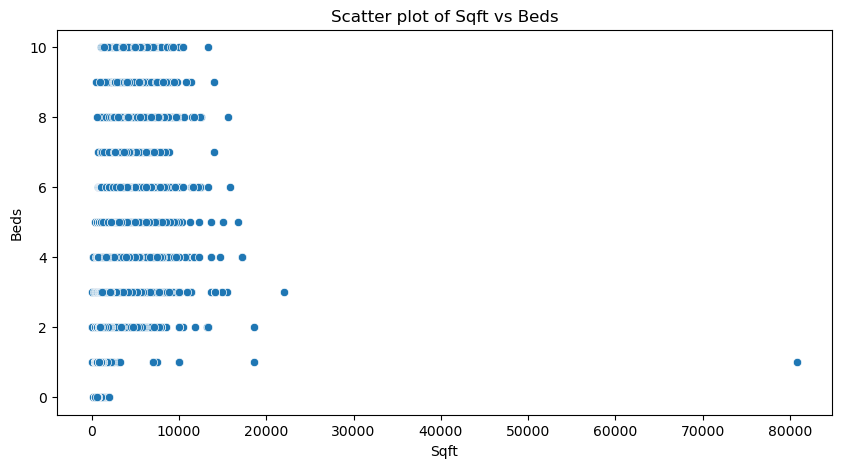

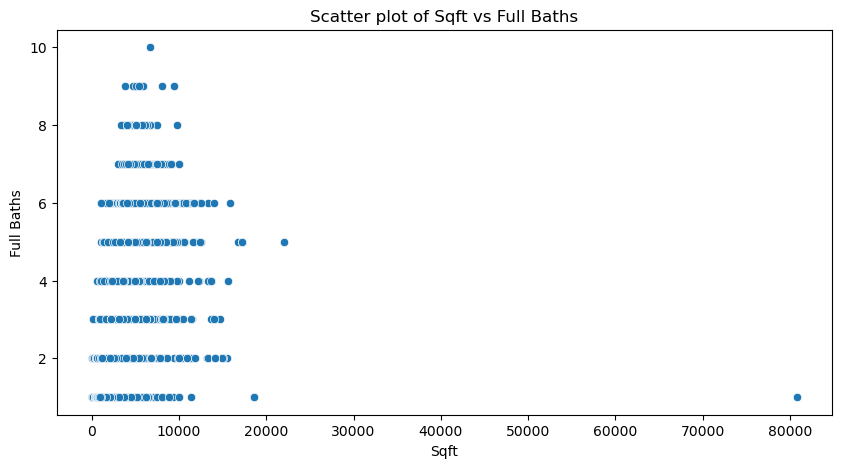

Correlation matrix:
                 beds  full_baths      sqft
beds        1.000000    0.625651  0.641925
full_baths  0.625651    1.000000  0.711885
sqft        0.641925    0.711885  1.000000


In [180]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='full_baths', y='beds', data=train_non_missing_beds)
plt.title('Scatter plot of Full Baths vs Beds')
plt.xlabel('Full Baths')
plt.ylabel('Beds')

plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft', y='beds', data=train_non_missing_beds)
plt.title('Scatter plot of Sqft vs Beds')
plt.xlabel('Sqft')
plt.ylabel('Beds')

plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft', y='full_baths', data=train_non_missing_baths)
plt.title('Scatter plot of Sqft vs Full Baths')
plt.xlabel('Sqft')
plt.ylabel('Full Baths')

plt.show()

correlation_matrix = train_non_missing_beds[['beds', 'full_baths', 'sqft']].corr()
print("Correlation matrix:\n", correlation_matrix)

The correlation matrix shows moderate to strong positive correlations between the variables. This supports the use of linear regression for imputation.



### Distribution Check: Compare Distributions

C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


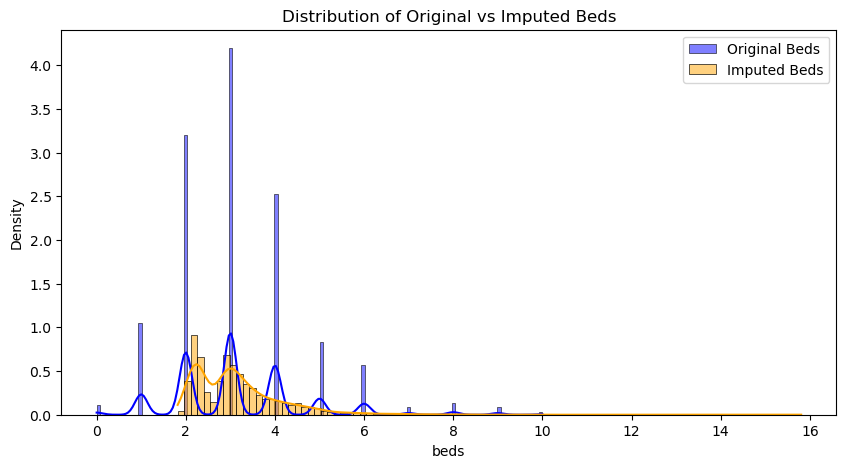

C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


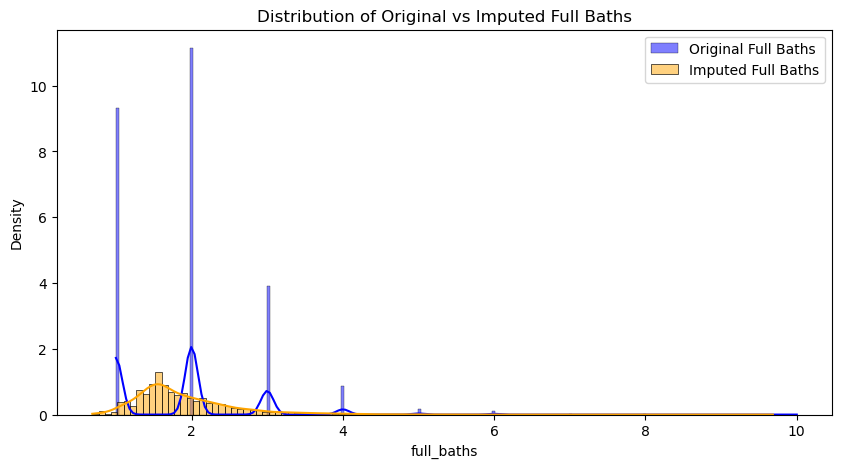

C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rashid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


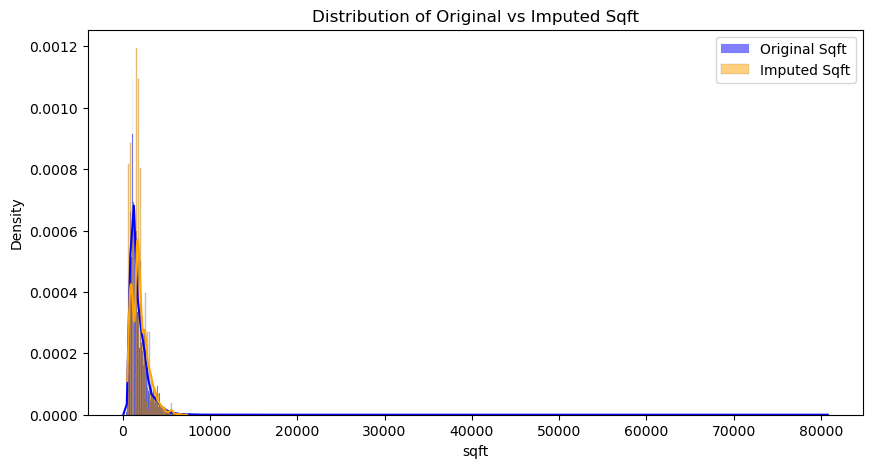

In [181]:
plt.figure(figsize=(10, 5))
sns.histplot(train_non_missing_beds['beds'], kde=True, label='Original Beds', color='blue', stat='density')
sns.histplot(test_df.loc[missing_beds.index, 'beds'], kde=True, label='Imputed Beds', color='orange', stat='density')
plt.title('Distribution of Original vs Imputed Beds')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(train_non_missing_baths['full_baths'], kde=True, label='Original Full Baths', color='blue', stat='density')
sns.histplot(test_df.loc[missing_baths.index, 'full_baths'], kde=True, label='Imputed Full Baths', color='orange', stat='density')
plt.title('Distribution of Original vs Imputed Full Baths')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(train_non_missing_sqft['sqft'], kde=True, label='Original Sqft', color='blue', stat='density')
sns.histplot(test_df.loc[missing_sqft.index, 'sqft'], kde=True, label='Imputed Sqft', color='orange', stat='density')
plt.title('Distribution of Original vs Imputed Sqft')
plt.legend()

plt.show()


The distributions of the imputed values are reasonably close to the original distributions, indicating that the imputation process did not introduce significant distortions.

### Verify Imputed Values

In [182]:
print("Imputed beds values:", test_df.loc[missing_beds.index, 'beds'].describe())
print("Imputed full baths values:", test_df.loc[missing_baths.index, 'full_baths'].describe())
print("Imputed sqft values:", test_df.loc[missing_sqft.index, 'sqft'].describe())

Imputed beds values: count    4875.000000
mean        3.154492
std         1.020972
min         1.817874
25%         2.321326
50%         2.970048
75%         3.557409
max        15.804553
Name: beds, dtype: float64
Imputed full baths values: count    5026.000000
mean        1.899270
std         0.681657
min         0.687506
25%         1.461064
50%         1.720226
75%         2.180795
max         9.683415
Name: full_baths, dtype: float64
Imputed sqft values: count    10210.000000
mean      1944.561536
std        964.653506
min        514.865799
25%       1205.002026
50%       1804.799055
75%       2494.935283
max       7383.650718
Name: sqft, dtype: float64


### Conclusions

The results and visualizations indicate that the regression imputation method is performing well for beds and full_baths, with imputed values closely matching the original distributions. However, the imputation for sqft shows higher MSE and more variability, suggesting that further refinement may be needed. We decide to apply regression imputation to `beds` and `full_baths` and drop `sqft`. 

### Apply regression imputation to `beds`, `full_baths`

In [186]:
imputed_property_df = impute_property_df.copy()

# split the data to create an artificial scenario for missing data handling
train_df, test_df = train_test_split(imputed_property_df[['beds', 'full_baths', 'sqft']], test_size=0.2, random_state=42)

# create missing values artificially in test set for 'beds' and 'full_baths'
for col in ['beds', 'full_baths']:
    missing_indices = np.random.choice(test_df.index, size=int(len(test_df) * 0.3), replace=False)
    test_df.loc[missing_indices, col] = np.nan

# copy the test set to another dataframe to retain the original values for comparison
original_test_df = test_df.copy()

# train the model to predict 'beds' using 'full_baths' and 'sqft'
train_non_missing_beds = train_df.dropna(subset=['full_baths', 'beds', 'sqft'])
beds_model = LinearRegression()
beds_model.fit(train_non_missing_beds[['full_baths', 'sqft']], train_non_missing_beds['beds'])

# predict missing 'beds' where 'full_baths' and 'sqft' are available
missing_beds = test_df[test_df['beds'].isnull() & test_df['full_baths'].notna() & test_df['sqft'].notna()]
if not missing_beds.empty:
    predicted_beds = beds_model.predict(missing_beds[['full_baths', 'sqft']])
    test_df.loc[missing_beds.index, 'beds'] = predicted_beds

# train the model to predict 'full_baths' using 'beds' and 'sqft'
train_non_missing_baths = train_df.dropna(subset=['beds', 'full_baths', 'sqft'])
baths_model = LinearRegression()
baths_model.fit(train_non_missing_baths[['beds', 'sqft']], train_non_missing_baths['full_baths'])

# predict missing 'full_baths' where 'beds' and 'sqft' are available
missing_baths = test_df[test_df['full_baths'].isnull() & test_df['beds'].notna() & test_df['sqft'].notna()]
if not missing_baths.empty:
    predicted_baths = baths_model.predict(missing_baths[['beds', 'sqft']])
    test_df.loc[missing_baths.index, 'full_baths'] = predicted_baths

# imputing 'beds'
missing_beds_original = imputed_property_df[imputed_property_df['beds'].isnull() & imputed_property_df['full_baths'].notna() & imputed_property_df['sqft'].notna()]
if not missing_beds_original.empty:
    predicted_beds_original = beds_model.predict(missing_beds_original[['full_baths', 'sqft']])
    imputed_property_df.loc[missing_beds_original.index, 'beds'] = predicted_beds_original

# imputing 'full_baths'
missing_baths_original = imputed_property_df[imputed_property_df['full_baths'].isnull() & imputed_property_df['beds'].notna() & imputed_property_df['sqft'].notna()]
if not missing_baths_original.empty:
    predicted_baths_original = baths_model.predict(missing_baths_original[['beds', 'sqft']])
    imputed_property_df.loc[missing_baths_original.index, 'full_baths'] = predicted_baths_original

                                                   property_url  \
1  https://www.realtor.com/realestateandhomes-detail/7430414029   
2  https://www.realtor.com/realestateandhomes-detail/7970105187   
3  https://www.realtor.com/realestateandhomes-detail/7464917401   
5  https://www.realtor.com/realestateandhomes-detail/7743001305   
7  https://www.realtor.com/realestateandhomes-detail/8643385821   

                         style  beds  full_baths    sqft  sold_price  \
1                SINGLE_FAMILY   3.0         1.0  1122.0         2.0   
2                SINGLE_FAMILY   3.0         1.0   770.0      5000.0   
3                 MULTI_FAMILY   5.0         2.0     NaN    263000.0   
5  CONDO_TOWNHOME_ROWHOME_COOP   1.0         1.0   700.0    230000.0   
7                SINGLE_FAMILY   3.0         2.0  1000.0    264000.0   

  last_sold_date   latitude  longitude  
1     2014-03-06  41.784561 -87.667639  
2     2014-03-06  41.857665 -87.710643  
3     2014-03-06  41.943861 -87.761011  


## III. Feature Engineering <a id="feature-engineering"></a>


### Adding neighborhood and region labels to crime and property data <a id="neighborhood-region-labels"></a>

#### Crime data

In [56]:
#!pip install shapely
#!pip install geopandas

In [59]:
crime_geometry = [Point(xy) for xy in zip(crime_df['longitude'], crime_df['latitude'])]

crime_gdf = gpd.GeoDataFrame(crime_df, geometry=crime_geometry, crs='EPSG:4326')

neighborhoods = gpd.read_file('C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/boundries-chicago-community.geojson')

crime_df = gpd.sjoin(crime_gdf, neighborhoods, op='within')

C:\Users\Rashid\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [60]:
neighborhood_categories = {
    "South Side": [
        "SOUTH SHORE", "AUBURN GRESHAM", "ROSELAND", "CHATHAM", "GREATER GRAND CROSSING",
        "SOUTH CHICAGO", "CHICAGO LAWN", "ENGLEWOOD", "WEST PULLMAN", "GARFIELD RIDGE",
        "ASHBURN", "AVALON PARK", "MORGAN PARK", "GRAND BOULEVARD", "WOODLAWN", "SOUTH LAWNDALE",
        "KENWOOD", "CALUMET HEIGHTS", "DOUGLAS", "GAGE PARK", "WEST ELSDON", "SOUTH DEERING",
        "HEGEWISCH", "AVALON PARK", "WASHINGTON PARK", "ARMOUR SQUARE", "PULLMAN", "OAKLAND",
        "FULLER PARK", "BURNSIDE", "RIVERDALE"
    ],
    "Southwest Side": [
        "CLEARING", "WEST LAWN", "WEST ELSDON", "GARFIELD RIDGE",
        "ARCHER HEIGHTS", "BRIGHTON PARK", "MCKINLEY PARK"
    ],
    "Far Southwest Side": [
        "MOUNT GREENWOOD", "BEVERLY", "WASHINGTON HEIGHTS"
    ],
    "Southeast Side": [
        "HEGEWISCH", "SOUTH DEERING"
    ],
    "Central": [
        "NEAR NORTH SIDE", "LAKE VIEW", "WEST TOWN", "LINCOLN PARK", "NEAR WEST SIDE", "LOOP", "LOGAN SQUARE",
        "EDGEWATER", "UPTOWN"
    ],
    "Far North Side": [
        "ROGERS PARK", "NORWOOD PARK", "DUNNING", "EDISON PARK", "NORTH PARK"
    ],
    "North Side": [
        "NORTH CENTER", "LAKE VIEW", "LINCOLN PARK", "EDGEWATER", "UPTOWN"
    ],
    "Northwest Side": [
        "PORTAGE PARK", "WEST RIDGE", "IRVING PARK", "ALBANY PARK", "JEFFERSON PARK", "MONTCLARE", "HERMOSA"
    ],
    "West Side": [
        "AUSTIN", "WEST ENGLEWOOD", "BELMONT CRAGIN", "HUMBOLDT PARK", "AVONDALE", "NEW CITY", "CLEARING",
        "NORTH LAWNDALE", "BRIDGEPORT", "MOUNT GREENWOOD", "FOREST GLEN", "SOUTH LAWNDALE", "KENWOOD",
        "OHARE", "LOWER WEST SIDE", "EAST GARFIELD PARK", "EAST SIDE", "WEST GARFIELD PARK", "CALUMET HEIGHTS",
        "DOUGLAS", "WEST ELSDON", "HEGEWISCH", "AVALON PARK", "MCKINLEY PARK", "HERMOSA", "WASHINGTON PARK",
        "ARMOUR SQUARE", "ARCHER HEIGHTS", "PULLMAN", "OAKLAND", "FULLER PARK", "BURNSIDE", "RIVERDALE"
    ]
}

crime_df['region'] = crime_df['community'].apply(lambda x: next((k for k, v in neighborhood_categories.items() if x in v), 'Other'))

In [61]:
nan_check = crime_df.isna()

nan_counts = crime_df.isna().sum()

print(nan_counts)

has_any_nans = crime_df.isna().any().any()

print(has_any_nans)

date                    0
latitude                0
description             0
location_description    0
community_area          0
year                    0
domestic                0
fbi_code                0
longitude               0
primary_type            0
arrest                  0
id                      0
geometry                0
index_right             0
community               0
area                    0
shape_area              0
perimeter               0
area_num_1              0
area_numbe              0
comarea_id              0
comarea                 0
shape_len               0
region                  0
dtype: int64
False


In [62]:
columns_to_drop = ['area', 'perimeter', 'area_num_1', 'area_numbe', 'comarea_id', 'comarea', 'shape_len', 'id', 'index_right', 'community_area']
crime_df = crime_df.drop(columns=columns_to_drop)

In [63]:
print(impute_property_df.columns)


Index(['property_url', 'style', 'beds', 'full_baths', 'half_baths', 'sqft',
       'year_built', 'sold_price', 'last_sold_date', 'latitude', 'longitude',
       'sqft_mean', 'sqft_median', 'sqft_regression'],
      dtype='object')


#### Property data

In [77]:
property_geometry = [Point(xy) for xy in zip(impute_property_df['longitude'], impute_property_df['latitude'])]

property_gdf = gpd.GeoDataFrame(impute_property_df, geometry=property_geometry, crs='EPSG:4326')

neighborhoods = gpd.read_file('C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/boundries-chicago-community.geojson')

impute_property_df = gpd.sjoin(property_gdf, neighborhoods, op='within')

impute_property_df['region'] = impute_property_df['community'].apply(lambda x: next((k for k, v in neighborhood_categories.items() if x in v), 'Other'))

C:\Users\Rashid\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [78]:
impute_property_df.head(5)

,property_url,style,beds,full_baths,half_baths,sqft,year_built,sold_price,last_sold_date,latitude,...,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,region
1,https://www.realtor.com/realestateandhomes-detail/7430414029,SINGLE_FAMILY,3.0,1.0,NaN,1122.0,1910.0,2.0,2014-03-06,41.784561,...,WEST ENGLEWOOD,0,87947691.9478,0,67,67,0,0,40195.2033069,West Side
104,https://www.realtor.com/realestateandhomes-detail/7853533467,SINGLE_FAMILY,2.0,1.0,NaN,1023.0,1905.0,12000.0,2014-03-04,41.777357,...,WEST ENGLEWOOD,0,87947691.9478,0,67,67,0,0,40195.2033069,West Side
221,https://www.realtor.com/realestateandhomes-detail/8958299114,MULTI_FAMILY,6.0,2.0,2.0,2412.0,2008.0,285000.0,2014-02-05,41.782557,...,WEST ENGLEWOOD,0,87947691.9478,0,67,67,0,0,40195.2033069,West Side
259,https://www.realtor.com/realestateandhomes-detail/8215678422,MULTI_FAMILY,4.0,2.0,NaN,2424.0,1910.0,20000.0,2014-02-26,41.772501,...,WEST ENGLEWOOD,0,87947691.9478,0,67,67,0,0,40195.2033069,West Side
282,https://www.realtor.com/realestateandhomes-detail/8217392655,MULTI_FAMILY,4.0,2.0,NaN,2488.0,1905.0,10000.0,2014-02-26,41.767645,...,WEST ENGLEWOOD,0,87947691.9478,0,67,67,0,0,40195.2033069,West Side


In [79]:
columns_to_drop = ['area', 'perimeter', 'area_num_1', 'area_numbe', 'comarea_id', 'comarea', 'shape_len', 'index_right']
impute_property_df = impute_property_df.drop(columns=columns_to_drop)

In [80]:
csv_file_path = "clean_property.csv"

impute_property_df.to_csv(csv_file_path, index=False)

### Mapping crime incident types to categories <a id="mapping-crime-incident-types"></a>

In [64]:
crime_category_mapping = {
    'Violent Crimes': ['BATTERY', 'ASSAULT', 'ROBBERY', 'HOMICIDE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'KIDNAPPING', 'INTIMIDATION', 'STALKING'],
    'Property Crimes': ['CRIMINAL TRESSPASS', 'THEFT', 'CRIMINAL DAMAGE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ARSON'],
    'Drug-Related Crimes': ['NARCOTICS'],
    'Deceptive Practices and Fraud': ['DECEPTIVE PRACTICE'],
    'Public Order Crimes': ['WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY', 'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'],
    'Crimes Involving Children': ['OFFENSE INVOLVING CHILDREN'],
    'Other Crimes': ['OTHER OFFENSE', 'CRIMINAL TRESPASS', 'SEX OFFENSE', 'RITUALISM']
}

crime_df['crime_category'] = crime_df['primary_type'].apply(lambda x: next((k for k, v in crime_category_mapping.items() if x in v), None))

print(crime_df[['primary_type', 'crime_category']])

                       primary_type                 crime_category
0                   CRIMINAL DAMAGE                Property Crimes
9               MOTOR VEHICLE THEFT                Property Crimes
12           PUBLIC PEACE VIOLATION            Public Order Crimes
48                          BATTERY                 Violent Crimes
80                WEAPONS VIOLATION            Public Order Crimes
...                             ...                            ...
2530406               OTHER OFFENSE                   Other Crimes
2530421                       THEFT                Property Crimes
2530438          DECEPTIVE PRACTICE  Deceptive Practices and Fraud
2530466  OFFENSE INVOLVING CHILDREN      Crimes Involving Children
2530636                     ROBBERY                 Violent Crimes

[2478675 rows x 2 columns]


#### After comparing instances of robberies between my dataset and the city's official records, I can verify the accuracy of the information.

In [65]:
homicides_in_roseland_2019 = crime_df[(crime_df['community'] == 'SOUTH SHORE') & 
                                      (crime_df['year'] == 2019) & 
                                      (crime_df['crime_category'] == 'Violent Crimes') & 
                                      (crime_df['primary_type'] == 'ROBBERY')]

num_homicides = homicides_in_roseland_2019.shape[0]

print("Number of homicides in Roseland in 2019:", num_homicides)


Number of homicides in Roseland in 2019: 287


In [66]:
crime_df.crime_category.value_counts()

crime_category
Property Crimes                  1075392
Violent Crimes                    779058
Other Crimes                      224860
Deceptive Practices and Fraud     157712
Drug-Related Crimes               123359
Public Order Crimes                97829
Crimes Involving Children          20465
Name: count, dtype: int64

In [67]:
crime_df.shape

(2478675, 15)

#### Keeping only incidents that led to an arrest, property, violent and drug-related crimes <a id="arrests-property-violent-drug"></a>


##### Only arrests

In [68]:
crime_df = crime_df[crime_df['arrest'] == True]


In [69]:
crime_df.shape

(476077, 15)

In [70]:
crime_df.head(2)

,date,latitude,description,location_description,year,domestic,fbi_code,longitude,primary_type,arrest,geometry,community,shape_area,region,crime_category
12,2023-12-31 23:31:00,41.887919,OTHER VIOLATION,STREET,2023,False,24,-87.628019,PUBLIC PEACE VIOLATION,True,POINT (-87.62802 41.88792),NEAR NORTH SIDE,76675895.9728,Central,Public Order Crimes
80,2023-12-31 21:40:00,41.903165,UNLAWFUL POSSESSION - HANDGUN,STREET,2023,False,15,-87.629236,WEAPONS VIOLATION,True,POINT (-87.62924 41.90317),NEAR NORTH SIDE,76675895.9728,Central,Public Order Crimes


##### Only Property Crimes, Violent Crimes, Drug-related crimes

In [71]:
values_to_remove = ['None', 'Public Order Crimes', 'Other Offense', 'Deceptive Practices and Fraud', 'Crimes Involving Children', 'Other Crimes']

crime_df = crime_df[~crime_df['crime_category'].isin(values_to_remove)]

crime_df.reset_index(drop=True, inplace=True)

In [72]:
crime_df.crime_category.value_counts()

crime_category
Violent Crimes         132922
Drug-Related Crimes    122655
Property Crimes         75604
Name: count, dtype: int64

#### Total crimes for each crime category (including grand total) by year and community <a id="total-crimes-category"></a>


In [73]:
crime_totals = crime_df.groupby(['year', 'community', 'crime_category']).size().reset_index(name='incident_count')

In [74]:
crime_totals

,year,community,crime_category,incident_count
0,2014,ALBANY PARK,Drug-Related Crimes,148
1,2014,ALBANY PARK,Property Crimes,55
2,2014,ALBANY PARK,Violent Crimes,209
3,2014,ARCHER HEIGHTS,Drug-Related Crimes,53
4,2014,ARCHER HEIGHTS,Property Crimes,50
...,...,...,...,...
2299,2023,WEST TOWN,Property Crimes,108
2300,2023,WEST TOWN,Violent Crimes,182
2301,2023,WOODLAWN,Drug-Related Crimes,43
2302,2023,WOODLAWN,Property Crimes,52


In [76]:
crime_totals

,year,community,crime_category,incident_count
0,2014,ALBANY PARK,Drug-Related Crimes,148
1,2014,ALBANY PARK,Property Crimes,55
2,2014,ALBANY PARK,Violent Crimes,209
3,2014,ARCHER HEIGHTS,Drug-Related Crimes,53
4,2014,ARCHER HEIGHTS,Property Crimes,50
...,...,...,...,...
2299,2023,WEST TOWN,Property Crimes,108
2300,2023,WEST TOWN,Violent Crimes,182
2301,2023,WOODLAWN,Drug-Related Crimes,43
2302,2023,WOODLAWN,Property Crimes,52


#### Adding total population feature for each community to crime dataset <a id="total-population"></a>

In [81]:
directory = "C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population"
file_pattern = "chicago-community-pop-{year}.csv"

# columns to extract from each file
columns_to_extract = ['GEOG', 'TOT_POP', 'MEDINC', 'TOT_EMP_RES']

all_data = []

# Process each year from 2014 to 2023
for year in range(2014, 2024):
    file_path = os.path.join(directory, file_pattern.format(year=year))
    
    # check if the file exists
    if os.path.exists(file_path):
        print(f"Processing file: {file_path}")
        
        data = pd.read_csv(file_path)
        
        # handle column name variations for 2014 and 2015
        if year == 2014:
            data.rename(columns={'MUNI': 'GEOG'}, inplace=True)
        elif year == 2015:
            data.rename(columns={'CCA': 'GEOG', 'MED_INC': 'MEDINC'}, inplace=True)
        
        # check if all required columns are present
        if set(columns_to_extract).issubset(data.columns):
            selected_data = data[columns_to_extract]
            
            selected_data['year_data'] = year
            
            all_data.append(selected_data)
        else:
            missing_columns = set(columns_to_extract) - set(data.columns)
            print(f"Columns not found in file {file_path}: {missing_columns}")
    else:
        print(f"File not found: {file_path}")

final_data = pd.concat(all_data, ignore_index=True)

final_data.to_csv("chicago_community_population_combined.csv", index=False)

Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2014.csv
Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2015.csv
Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2016.csv
Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2017.csv
Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2018.csv
Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2019.csv
Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2020.csv
Processing file: C:/Users/R

C:\Users\Rashid\AppData\Local\Temp\ipykernel_2396\3545505250.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['year_data'] = year
C:\Users\Rashid\AppData\Local\Temp\ipykernel_2396\3545505250.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['year_data'] = year
C:\Users\Rashid\AppData\Local\Temp\ipykernel_2396\3545505250.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2022.csv
Processing file: C:/Users/Rashid/Documents/my_projects/chicago-crime-prop/data/chicago-community-population\chicago-community-pop-2023.csv


C:\Users\Rashid\AppData\Local\Temp\ipykernel_2396\3545505250.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['year_data'] = year


In [82]:
final_data = final_data[final_data['year_data'] != 2014]

In [83]:
final_data.head(3)

,GEOG,TOT_POP,MEDINC,TOT_EMP_RES,year_data
284,Albany Park,54018.0,50085.24833,16850.0,2015
285,Archer Heights,14106.0,43759.61538,4620.0,2015
286,Armour Square,14176.0,24101.02740,4599.0,2015


##### Merging final_data with crime_totals <a id="merge-finaldata-crimetotals"></a>

In [84]:
final_data.rename(columns={'year_data': 'year'}, inplace=True)

crime_totals['community'] = crime_totals['community'].str.upper().str.strip()
final_data['GEOG'] = final_data['GEOG'].str.upper().str.strip()

final_data = pd.merge(crime_totals, final_data, left_on=['community', 'year'], right_on=['GEOG', 'year'], how='inner')

final_data.drop('GEOG', axis=1, inplace=True)

   year       community       crime_category  incident_count  TOT_POP  \
0  2015     ALBANY PARK  Drug-Related Crimes             110  54018.0   
1  2015     ALBANY PARK      Property Crimes              54  54018.0   
2  2015     ALBANY PARK       Violent Crimes             177  54018.0   
3  2015  ARCHER HEIGHTS  Drug-Related Crimes              38  14106.0   
4  2015  ARCHER HEIGHTS      Property Crimes              29  14106.0   

        MEDINC  TOT_EMP_RES  
0  50085.24833      16850.0  
1  50085.24833      16850.0  
2  50085.24833      16850.0  
3  43759.61538       4620.0  
4  43759.61538       4620.0  


In [85]:
final_data.head(2)

,year,community,crime_category,incident_count,TOT_POP,MEDINC,TOT_EMP_RES
0,2015,ALBANY PARK,Drug-Related Crimes,110,54018.0,50085.24833,16850.0
1,2015,ALBANY PARK,Property Crimes,54,54018.0,50085.24833,16850.0


In [86]:
final_data.head(2)

,year,community,crime_category,incident_count,TOT_POP,MEDINC,TOT_EMP_RES
0,2015,ALBANY PARK,Drug-Related Crimes,110,54018.0,50085.24833,16850.0
1,2015,ALBANY PARK,Property Crimes,54,54018.0,50085.24833,16850.0


In [96]:
crime_df.head(2)

,date,latitude,description,location_description,year,domestic,fbi_code,longitude,primary_type,arrest,geometry,community,shape_area,region,crime_category
0,2023-12-31 20:02:00,41.891926,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,SIDEWALK,2023,False,18,-87.628074,NARCOTICS,True,POINT (-87.62807 41.89193),NEAR NORTH SIDE,76675895.9728,Central,Drug-Related Crimes
1,2023-12-31 20:00:00,41.890052,SIMPLE,STREET,2023,False,08A,-87.628914,ASSAULT,True,POINT (-87.62891 41.89005),NEAR NORTH SIDE,76675895.9728,Central,Violent Crimes


In [88]:
crime_merged_df = pd.merge(crime_df, final_data, on=['community', 'year', 'crime_category'], how='inner')


In [97]:
csv_file_path = "clean_crime.csv"

crime_merged_df.to_csv(csv_file_path, index=False)

In [90]:
crime_merged_df.head(2)

,date,latitude,description,location_description,year,domestic,fbi_code,longitude,primary_type,arrest,geometry,community,shape_area,region,crime_category,incident_count,TOT_POP,MEDINC,TOT_EMP_RES
0,2023-12-31 20:02:00,41.891926,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,SIDEWALK,2023,False,18,-87.628074,NARCOTICS,True,POINT (-87.62807 41.89193),NEAR NORTH SIDE,76675895.9728,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0
1,2023-12-29 02:57:00,41.896823,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,2023,False,18,-87.638683,NARCOTICS,True,POINT (-87.63868 41.89682),NEAR NORTH SIDE,76675895.9728,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0


In [91]:
nan_check = crime_merged_df.isna()

nan_counts = crime_merged_df.isna().sum()

print(nan_counts)

has_any_nans = crime_merged_df.isna().any().any()

print(has_any_nans)

date                    0
latitude                0
description             0
location_description    0
year                    0
domestic                0
fbi_code                0
longitude               0
primary_type            0
arrest                  0
geometry                0
community               0
shape_area              0
region                  0
crime_category          0
incident_count          0
TOT_POP                 0
MEDINC                  0
TOT_EMP_RES             0
dtype: int64
False


In [92]:
impute_property_df.head(4)

,property_url,style,beds,full_baths,half_baths,sqft,year_built,sold_price,last_sold_date,latitude,longitude,sqft_mean,sqft_median,sqft_regression,geometry,community,shape_area,region
1,https://www.realtor.com/realestateandhomes-detail/7430414029,SINGLE_FAMILY,3.0,1.0,NaN,1122.0,1910.0,2.0,2014-03-06,41.784561,-87.667639,1122.0,1122.0,1122.0,POINT (-87.66764 41.78456),WEST ENGLEWOOD,87947691.9478,West Side
104,https://www.realtor.com/realestateandhomes-detail/7853533467,SINGLE_FAMILY,2.0,1.0,NaN,1023.0,1905.0,12000.0,2014-03-04,41.777357,-87.670595,1023.0,1023.0,1023.0,POINT (-87.67060 41.77736),WEST ENGLEWOOD,87947691.9478,West Side
221,https://www.realtor.com/realestateandhomes-detail/8958299114,MULTI_FAMILY,6.0,2.0,2.0,2412.0,2008.0,285000.0,2014-02-05,41.782557,-87.658622,2412.0,2412.0,2412.0,POINT (-87.65862 41.78256),WEST ENGLEWOOD,87947691.9478,West Side
259,https://www.realtor.com/realestateandhomes-detail/8215678422,MULTI_FAMILY,4.0,2.0,NaN,2424.0,1910.0,20000.0,2014-02-26,41.772501,-87.660852,2424.0,2424.0,2424.0,POINT (-87.66085 41.77250),WEST ENGLEWOOD,87947691.9478,West Side


In [93]:
crime_merged_df.head(2)

,date,latitude,description,location_description,year,domestic,fbi_code,longitude,primary_type,arrest,geometry,community,shape_area,region,crime_category,incident_count,TOT_POP,MEDINC,TOT_EMP_RES
0,2023-12-31 20:02:00,41.891926,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,SIDEWALK,2023,False,18,-87.628074,NARCOTICS,True,POINT (-87.62807 41.89193),NEAR NORTH SIDE,76675895.9728,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0
1,2023-12-29 02:57:00,41.896823,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,2023,False,18,-87.638683,NARCOTICS,True,POINT (-87.63868 41.89682),NEAR NORTH SIDE,76675895.9728,Central,Drug-Related Crimes,175,98505.0,114790.1428,52122.0


### Key Transformations

- Removed sold prices above 99th percentile (above $3.5 million)
- Removed rows where the number of beds or full baths exceed 10 
- Applied regression imputation to ‘beds’ and ‘full_baths’
- For the crime dataset, we kept only rows where incidents led to an arrest and crimes that were property, violent and drug-related
